#### ANÁLISIS EXPLORATORIO DE DATOS

Este es un primer EDA sin haber tratado los nulos, las columnas redundantes y los resultados inconsistentes, por lo que si bien es una primera aproximación de los datos que tenemos, los resultados reales podrían estar bastante alejados de estos resultados. Es necesario en cada momento contextualizar las condiciones en las que se han obtenido los datos.

In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
import pandas as pd
import numpy as np
from IPython.display import display


# Librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# ver todas las columnas
pd.set_option('display.max_columns', None)

In [3]:
# ver todas las filas
pd.set_option('display.max_rows', None)

In [ ]:
# Cargamos el csv

df = pd.read_csv("ABC_data.csv", index_col = 0)

df

In [6]:
df.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
0,51,No,NaN,2015.722222,NaN,6,3,NaN,1,1,1,0,NaN,3,5,resEArch DIREcToR,3,NaN,"16280,83$","42330,17$",7,Y,No,13,"3,0",3,Full Time,0,NaN,5,"3,0",20,NaN,15,15,"16280,83$",1972,"195370,00$",NaN,NaN,Yes
1,52,No,NaN,2063.388889,NaN,1,4,Life Sciences,1,2,3,0,NaN,2,5,ManAGeR,3,NaN,NaN,"43331,17$",0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,NaN,1971,"199990,00$",NaN,NaN,1
2,42,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,1,3,3,0,NaN,3,5,ManaGER,4,Married,NaN,"41669,33$",1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,NaN,1981,"192320,00$",ManaGER - Research & Development,NaN,1
3,47,No,travel_rarely,1771.404762,NaN,2,4,Medical,1,4,1,1,NaN,3,4,ReseArCH DIrECtOr,3,Married,"14307,50$","37199,50$",3,Y,NaN,19,"3,0",2,Full Time,2,NaN,2,NaN,20,NaN,5,6,"14307,50$",1976,"171690,00$",NaN,NaN,False
4,46,No,NaN,1582.771346,NaN,3,3,Technical Degree,1,5,1,1,NaN,4,4,sAleS EXECUtIve,1,Divorced,"12783,92$","33238,20$",2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,"12783,92$",1977,NaN,NaN,NaN,0


Necesitamos hacer una copia del dataframe porque se van a convertir las columnas object que sean numéricas para realizar un EDA más exacto.  Y queremos que nuestro dataframe de inicio quede intacto.

In [ ]:
import warnings

def limpiar_df(df):
    """
    Convierte automáticamente columnas object que sean numéricas o fechas.
    Modifica el DataFrame recibido.
    Ignora warnings de pandas sobre inferencia de formato de fechas.
    """
    # Ignorar UserWarning de pandas
    warnings.filterwarnings("ignore", category=UserWarning)
    
    for col in df.select_dtypes(include='object').columns:
        # Intentar convertir a número
        try:
            df[col] = pd.to_numeric(df[col], errors='raise')
            continue
        except:
            pass
        # Intentar convertir a fecha
        try:
            df[col] = pd.to_datetime(df[col], errors='raise', dayfirst=False)
        except:
            pass  # Si falla, dejamos como object (categórica)
    
    # Restaurar warnings
    warnings.resetwarnings()
    
    return df


# Crear copia
df_limpio = df.copy()

# Limpiar la copia
limpiar_df(df_limpio)

# Ahora df_limpio tiene columnas numéricas y fechas convertidas,
# y las columnas categóricas reales siguen siendo object


In [ ]:
def eda(df):
    """
    Realiza un análisis exploratorio de datos sobre un DataFrame ya limpio:
    - Primeras filas
    - Dimensiones
    - Tipos de datos
    - Estadísticas numéricas y categóricas
    - Valores nulos
    - Filas duplicadas
    - Valores únicos
    - Distribución de variables categóricas
    - Resumen general
    - Resumen de columnas con nulos
    """
    print("ANÁLISIS EXPLORATORIO DE DATOS\n")

    print("PRIMERAS 10 FILAS:")
    display(df.head(10))

    print("\n DIMENSIONES:")
    print(df.shape)

    print("\nInformación general:")
    df.info()

    print("\nTipos de datos por columna:")
    print(df.dtypes)

    # Columnas numéricas
    num_cols = df.select_dtypes(include='number').columns
    if len(num_cols) > 0:
        print("\nEstadísticas numéricas:")
        display(df[num_cols].describe().T)

    # Columnas categóricas reales
    cat_cols = df.select_dtypes(include='object').columns
    if len(cat_cols) > 0:
        print("\nEstadísticas categóricas:")
        display(df[cat_cols].describe())

    # Valores nulos
    print("\nValores nulos:")
    nulos_df = pd.DataFrame({
        "Conteo": df.isnull().sum(),
        "Porcentaje": (df.isnull().sum()/len(df)*100).round(2)
    }).sort_values(by="Porcentaje", ascending=False)
    display(nulos_df)

    # Filas duplicadas
    print("\nFilas duplicadas:", df.duplicated().sum())

    # Valores únicos
    print("\nValores únicos por columna:")
    display(df.nunique().sort_values(ascending=False))

    # Distribución de variables categóricas
    for col in cat_cols:
        print(f"\nColumna: {col}")
        display(df[col].value_counts().head())

    # Resumen general
    resumen = pd.DataFrame({
        "Columna": df.columns,
        "Dtype": df.dtypes.astype(str),
        "Valores únicos": df.nunique().values,
        "% Nulos": (df.isnull().sum()/len(df)*100).round(2).values
    })
    print("\n RESUMEN GENERAL DE COLUMNAS:")
    display(resumen)

    # Resumen SOLO con columnas que tienen nulos
    resumen_nulos = resumen[resumen["% Nulos"] > 0].sort_values(by="% Nulos", ascending=False)
    if not resumen_nulos.empty:
        print("\n RESUMEN DE COLUMNAS CON VALORES NULOS:")
        display(resumen_nulos)
    else:
        print("\nNo hay columnas con valores nulos")

    return resumen, resumen_nulos

In [17]:
# df_limpio es la copia, df original queda intacto
resumen = eda(df_limpio)   # Hacemos el EDA antes de eliminar columnas

ANÁLISIS EXPLORATORIO DE DATOS

Primeras 10 filas:


,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
0,51,No,NaN,2015.722222,NaN,6,3,NaN,1,1,1,0,NaN,3,5,resEArch DIREcToR,3,NaN,"16280,83$","42330,17$",7,Y,No,13,"3,0",3,Full Time,0,NaN,5,"3,0",20,NaN,15,15,"16280,83$",1972,"195370,00$",NaN,NaN,Yes
1,52,No,NaN,2063.388889,NaN,1,4,Life Sciences,1,2,3,0,NaN,2,5,ManAGeR,3,NaN,NaN,"43331,17$",0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,NaN,1971,"199990,00$",NaN,NaN,1
2,42,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,1,3,3,0,NaN,3,5,ManaGER,4,Married,NaN,"41669,33$",1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,NaN,1981,"192320,00$",ManaGER - Research & Development,NaN,1
3,47,No,travel_rarely,1771.404762,NaN,2,4,Medical,1,4,1,1,NaN,3,4,ReseArCH DIrECtOr,3,Married,"14307,50$","37199,50$",3,Y,NaN,19,"3,0",2,Full Time,2,NaN,2,NaN,20,NaN,5,6,"14307,50$",1976,"171690,00$",NaN,NaN,False
4,46,No,NaN,1582.771346,NaN,3,3,Technical Degree,1,5,1,1,NaN,4,4,sAleS EXECUtIve,1,Divorced,"12783,92$","33238,20$",2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,"12783,92$",1977,NaN,NaN,NaN,0
5,48,No,NaN,1771.920635,Research & Development,22,3,Medical,1,6,4,1,NaN,3,4,MANAger,4,NaN,"14311,67$","37210,33$",3,NaN,No,11,"3,0",2,NaN,1,NaN,3,"3,0",22,NaN,4,7,"14311,67$",1975,NaN,MANAger - Research & Development,NaN,Yes
6,59,No,NaN,1032.487286,NaN,25,3,Life Sciences,1,7,1,1,NaN,3,3,Sales ExeCutIVe,1,NaN,"8339,32$","21682,23$",7,Y,NaN,11,"3,0",4,Part Time,0,"28,0",3,"2,0",21,NaN,7,9,"8339,32$",1964,"100071,84$",NaN,NaN,True
7,42,No,travel_rarely,556.256661,NaN,1,1,NaN,1,8,2,0,69.532083,3,2,Sales eXEcUTiVe,3,Married,NaN,"11681,39$",1,NaN,No,25,"4,0",3,Part Time,0,"20,0",3,"3,0",20,NaN,11,6,NaN,1981,"53914,11$",NaN,NaN,0
8,41,No,NaN,1712.182540,NaN,2,5,NaN,1,9,2,1,NaN,3,4,mANAGEr,1,Married,"13829,17$","35955,83$",7,NaN,No,16,"3,0",2,Full Time,1,"22,0",2,"3,0",18,NaN,11,8,"13829,17$",1982,"165950,00$",NaN,NaN,True
9,41,No,travel_frequently,1973.984127,NaN,9,3,NaN,1,10,1,0,NaN,3,5,reSEaRCH DIrectoR,3,NaN,"15943,72$","41453,67$",2,NaN,No,17,"3,0",2,NaN,1,"21,0",2,"4,0",18,NaN,0,11,"15943,72$",1982,NaN,NaN,NaN,0



Dimensiones:
(1678, 41)

Información general:
<class 'pandas.core.frame.DataFrame'>
Index: 1678 entries, 0 to 1677
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1678 non-null   object 
 1   attrition                 1678 non-null   object 
 2   businesstravel            877 non-null    object 
 3   dailyrate                 1678 non-null   float64
 4   department                312 non-null    object 
 5   distancefromhome          1678 non-null   int64  
 6   education                 1678 non-null   int64  
 7   educationfield            904 non-null    object 
 8   employeecount             1678 non-null   int64  
 9   employeenumber            1678 non-null   int64  
 10  environmentsatisfaction   1678 non-null   int64  
 11  gender                    1678 non-null   int64  
 12  hourlyrate                411 non-null    float64
 13  jobinvolvement       

,count,mean,std,min,25%,50%,75%,max
dailyrate,1678.0,668.079714,470.787298,104.103175,290.035510,556.256661,971.956349,2063.388889
distancefromhome,1678.0,4.504172,14.652066,-49.000000,2.000000,5.000000,11.000000,29.000000
education,1678.0,2.932658,1.024270,1.000000,2.000000,3.000000,4.000000,5.000000
employeecount,1678.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
employeenumber,1678.0,809.859952,467.084867,1.000000,403.250000,813.500000,1215.750000,1614.000000
environmentsatisfaction,1678.0,4.264005,6.912695,1.000000,2.000000,3.000000,4.000000,49.000000
gender,1678.0,0.398689,0.489774,0.000000,0.000000,0.000000,1.000000,1.000000
hourlyrate,411.0,83.140768,57.272101,13.012897,36.254439,69.532083,116.987103,255.963294
jobinvolvement,1678.0,2.740763,0.710359,1.000000,2.000000,3.000000,3.000000,4.000000
joblevel,1678.0,2.064362,1.099425,1.000000,1.000000,2.000000,3.000000,5.000000



Estadísticas categóricas:


,age,attrition,businesstravel,department,educationfield,jobrole,maritalstatus,monthlyincome,monthlyrate,over18,overtime,performancerating,standardhours,totalworkingyears,worklifebalance,yearsincurrentrole,sameasmonthlyincome,salary,roledepartament,remotework
count,1678,1678,877,312,904,1678,1003,1189,1678,740,982,1478,1327,1129,1564,35,1189,1393,312,1678
unique,54,2,3,3,6,1579,5,493,673,1,2,2,2,40,4,10,493,583,301,5
top,35,No,travel_rarely,Research & Development,Life Sciences,mANager,Married,"2342,59$","11681,39$",Y,No,"3,0",Part Time,"10,0","3,0","2,0","2342,59$","53914,11$",Sales exECutIVE - Sales,1
freq,88,1406,616,203,367,5,419,228,326,740,714,1257,927,151,946,12,228,270,2,375



Valores nulos:


,Conteo,Porcentaje
numberchildren,1678,100.00
yearsincurrentrole,1643,97.91
roledepartament,1366,81.41
department,1366,81.41
hourlyrate,1267,75.51
over18,938,55.90
businesstravel,801,47.74
educationfield,774,46.13
overtime,696,41.48
maritalstatus,675,40.23



Filas duplicadas: 64

Valores únicos por columna:


employeenumber              1614
jobrole                     1579
monthlyrate                  673
dailyrate                    673
salary                       583
monthlyincome                493
sameasmonthlyincome          493
roledepartament              301
hourlyrate                   194
distancefromhome              69
age                           54
datebirth                     43
totalworkingyears             40
environmentsatisfaction       38
yearsatcompany                37
yearswithcurrmanager          18
yearssincelastpromotion       16
percentsalaryhike             15
numcompaniesworked            10
yearsincurrentrole            10
trainingtimeslastyear          7
educationfield                 6
education                      5
remotework                     5
maritalstatus                  5
joblevel                       5
worklifebalance                4
jobsatisfaction                4
relationshipsatisfaction       4
stockoptionlevel               4
jobinvolve


Columna: age


age
35    88
31    88
34    86
29    82
36    79
Name: count, dtype: int64


Columna: attrition


attrition
No     1406
Yes     272
Name: count, dtype: int64


Columna: businesstravel


businesstravel
travel_rarely        616
travel_frequently    168
non-travel            93
Name: count, dtype: int64


Columna: department


department
Research & Development     203
Sales                       93
Human Resources             16
Name: count, dtype: int64


Columna: educationfield


educationfield
Life Sciences       367
Medical             286
Marketing           106
Technical Degree     70
Other                63
Name: count, dtype: int64


Columna: jobrole


jobrole
mANager     5
mAnageR     3
ManagEr     3
mAnaGeR     3
ManageR     3
Name: count, dtype: int64


Columna: maritalstatus


maritalstatus
Married     419
Single      343
Divorced    194
Marreid      36
divorced     11
Name: count, dtype: int64


Columna: monthlyincome


monthlyincome
2342,59$     228
4492,84$     227
8339,32$     105
12783,92$     42
15943,72$     25
Name: count, dtype: int64


Columna: monthlyrate


monthlyrate
11681,39$    326
6090,75$     308
21682,23$    150
33238,20$     55
41453,67$     38
Name: count, dtype: int64


Columna: over18


over18
Y    740
Name: count, dtype: int64


Columna: overtime


overtime
No     714
Yes    268
Name: count, dtype: int64


Columna: performancerating


performancerating
3,0    1257
4,0     221
Name: count, dtype: int64


Columna: standardhours


standardhours
Part Time    927
Full Time    400
Name: count, dtype: int64


Columna: totalworkingyears


totalworkingyears
10,0    151
6,0      88
8,0      86
9,0      71
5,0      68
Name: count, dtype: int64


Columna: worklifebalance


worklifebalance
3,0    946
2,0    374
4,0    162
1,0     82
Name: count, dtype: int64


Columna: yearsincurrentrole


yearsincurrentrole
2,0    12
7,0     5
0,0     4
4,0     3
1,0     3
Name: count, dtype: int64


Columna: sameasmonthlyincome


sameasmonthlyincome
2342,59$     228
4492,84$     227
8339,32$     105
12783,92$     42
15943,72$     25
Name: count, dtype: int64


Columna: salary


salary
53914,11$     270
28111,13$     255
100071,84$    122
153407,07$     45
191324,62$     28
Name: count, dtype: int64


Columna: roledepartament


roledepartament
Sales exECutIVE  -  Sales                                2
humAN resoURCEs  -  Human Resources                      2
labORAtoRy tEcHNICIAN  -  Research & Development         2
hEalthCaRe reprEseNTaTiVe  -  Research & Development     2
LaBoratory TECHnICIAn  -  Research & Development         2
Name: count, dtype: int64


Columna: remotework


remotework
1        375
True     362
False    318
0        318
Yes      305
Name: count, dtype: int64


Resumen general de columnas:


,Columna,Dtype,Valores únicos,% Nulos
age,age,object,54,0.00
attrition,attrition,object,2,0.00
businesstravel,businesstravel,object,3,47.74
dailyrate,dailyrate,float64,673,0.00
department,department,object,3,81.41
distancefromhome,distancefromhome,int64,69,0.00
education,education,int64,5,0.00
educationfield,educationfield,object,6,46.13
employeecount,employeecount,int64,1,0.00
employeenumber,employeenumber,int64,1614,0.00



Resumen SOLO de columnas con nulos:


,Columna,Dtype,Valores únicos,% Nulos
numberchildren,numberchildren,float64,0,100.00
yearsincurrentrole,yearsincurrentrole,object,10,97.91
department,department,object,3,81.41
roledepartament,roledepartament,object,301,81.41
hourlyrate,hourlyrate,float64,194,75.51
over18,over18,object,1,55.90
businesstravel,businesstravel,object,3,47.74
educationfield,educationfield,object,6,46.13
overtime,overtime,object,2,41.48
maritalstatus,maritalstatus,object,5,40.23


Además, podemos completar con gráficos para que se vea de forma más clara alguna de las informaciones obtenidas en el EDA, como por ejemplo el porcentaje de nulos por columna, para lo que vamos a recurrir a un gráfico de barras horizontal:

In [8]:
def grafico_nulos(df):
    """
    Genera un gráfico de barras horizontal con el porcentaje de nulos por columna.
    Solo muestra las columnas que tienen nulos, sin el cuadro (spines).
    """
    nulos_df = pd.DataFrame({
        "Conteo": df.isnull().sum(),
        "Porcentaje": (df.isnull().sum()/len(df)*100).round(2)
    })
    nulos_df = nulos_df[nulos_df["Conteo"] > 0].sort_values(by="Porcentaje", ascending=True)

    if nulos_df.empty:
        print("No hay columnas con valores nulos")
        return

    plt.figure(figsize=(8, 5))
    ax = sns.barplot(
        x="Porcentaje",
        y=nulos_df.index,
        data=nulos_df,
        palette="Blues"
    )

    # Quitar los bordes (spines)
    sns.despine(left=True, bottom=True)

    # Añadir etiquetas con los porcentajes
    for i, v in enumerate(nulos_df["Porcentaje"]):
        ax.text(v + 0.5, i, f"{v:.2f}%", va="center")

    plt.title("Porcentaje de valores nulos por columna")
    plt.xlabel("Porcentaje (%)")
    plt.ylabel("Columnas")
    plt.show()

C:\Users\apdue\AppData\Local\Temp\ipykernel_22272\1604187864.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


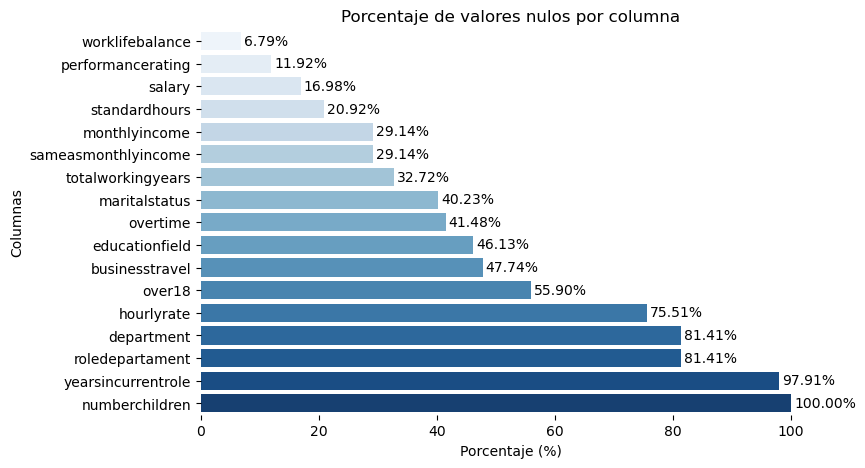

In [9]:
grafico_nulos(df_limpio)   #quitar el warning

A nuestro juicio, de forma gráfica se entiende mucho más claro las columnas que tienen nulos y el porcentaje de los mismos, que si se hace mostrándolo con tablas o dataframes.

#### VISUALIZACIÓN DEL ANÁLISIS EXPLORATORIO DE DATOS

Antes de iniciar la limpieza y la gestión de valores nulos en el dataset, se realiza una primera visualización exploratoria de todas las columnas numéricas mediante histogramas y boxplots.

El objetivo de esta etapa preliminar es:

Identificar inconsistencias o errores en los datos.

Detectar outliers (valores extremos) que puedan afectar análisis posteriores.

Observar la distribución de los datos para detectar posibles asimetrías o sesgos.

Obtener información general que permita tomar decisiones lógicas para la limpieza y el tratamiento de nulos.

Se han escogido específicamente histogramas y boxplots porque cada gráfico aporta información complementaria:

El histograma permite visualizar la distribución general de los datos, detectar sesgos, agrupaciones, concentraciones y vacíos en los valores, proporcionando información esencial para un correcto tratamiento de los datos. La curva de densidad asociada ayuda a comprender de manera más clara las posibles asimetrías.

El boxplot destaca los valores atípicos (outliers), la mediana y la dispersión intercuartílica de cada columna, lo que facilita identificar casos extremos que podrían influir negativamente en análisis estadísticos o en la imputación de valores nulos.

Es importante destacar que esta visualización refleja el estado original de los datos, ya que, más allá de haber eliminado columnas que a simple vista no contenían información relevante o eran copias de otras, no se ha aplicado ningún tratamiento adicional. Como es una primera exploración, los nombres de las columnas aún no están depurados.

Por tanto, tras la limpieza, la gestión de nulos y el manejo de valores extremos, es esperable que tanto los gráficos como los estadísticos descriptivos del EDA presenten diferencias significativas respecto a esta primera etapa, mostrando una versión más depurada y coherente de la información contenida en el dataset.





### VISUALIZACIÓN DE DATOS DE CADA UNA DE LAS COLUMNAS 

In [10]:
def graficar_columna(df, col=None, bins=30, discrete_threshold=20, figsize=(12,5)):
    """
    Grafica columnas del DataFrame.
    
    - Si col es un nombre de columna → grafica solo esa columna
    - Si col=None → grafica todas las columnas
    
    Tipos de gráficos:
    - Numéricas: histograma (o countplot si discreta) + boxplot
    - Categóricas: gráfico de barras
    
    Parámetros
    ----------
    df : pd.DataFrame
        DataFrame de entrada
    col : str o None
        Nombre de la columna a graficar, o None para todas
    bins : int
        Número de bins para histogramas de variables continuas
    discrete_threshold : int
        Máx. nº de valores únicos para tratar variable numérica como discreta
    figsize : tuple
        Tamaño de la figura
    """
    cols = [col] if col else df.columns
    
    for c in cols:
        if c not in df.columns:
            print(f"La columna '{c}' no existe en el DataFrame.")
            continue
        
        serie = df[c].dropna()
        
        if pd.api.types.is_numeric_dtype(serie):
            # --- Numéricas ---
            fig, axes = plt.subplots(1, 2, figsize=figsize)
            
            if pd.api.types.is_integer_dtype(serie) and serie.nunique() < discrete_threshold:
                sns.countplot(x=serie, ax=axes[0], color="skyblue")
                axes[0].set_title(f"Gráfico de barras de {c}")
            else:
                sns.histplot(serie, bins=bins, kde=True, ax=axes[0], color="skyblue")
                axes[0].set_title(f"Histograma de {c}")
            
            sns.boxplot(x=serie, ax=axes[1], color="lightgreen")
            axes[1].set_title(f"Boxplot de {c}")
            
            plt.tight_layout()
            plt.show()
        
        else:
            # --- Categóricas ---
            plt.figure(figsize=figsize)
            value_counts = serie.value_counts().head(20)  # máximo 20 categorías visibles
            sns.barplot(x=value_counts.index, y=value_counts.values, palette="Pastel1")
            plt.title(f"Distribución de {c}")
            plt.xlabel("Categorías")
            plt.ylabel("Frecuencia")
            plt.xticks(rotation=45)
            plt.show()

C:\Users\apdue\AppData\Local\Temp\ipykernel_22272\425956999.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Pastel1")


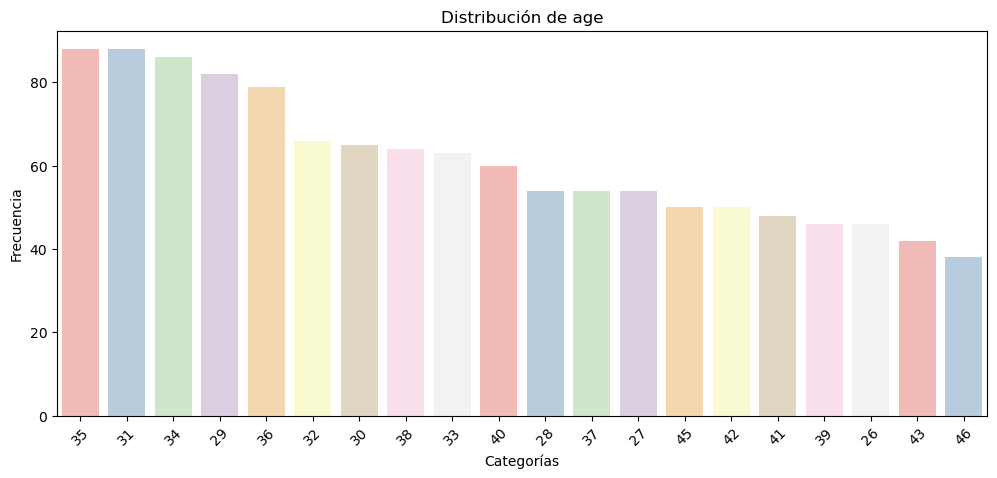

C:\Users\apdue\AppData\Local\Temp\ipykernel_22272\425956999.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Pastel1")


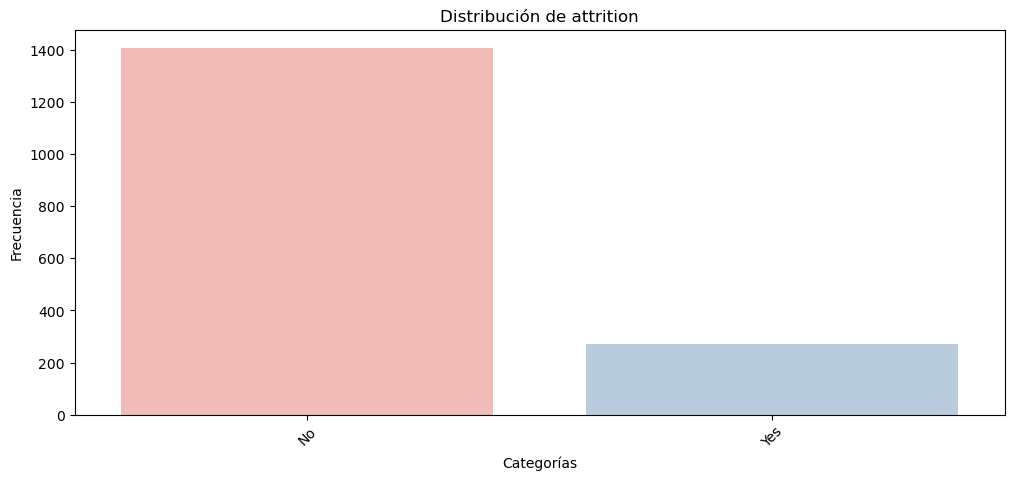

C:\Users\apdue\AppData\Local\Temp\ipykernel_22272\425956999.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Pastel1")


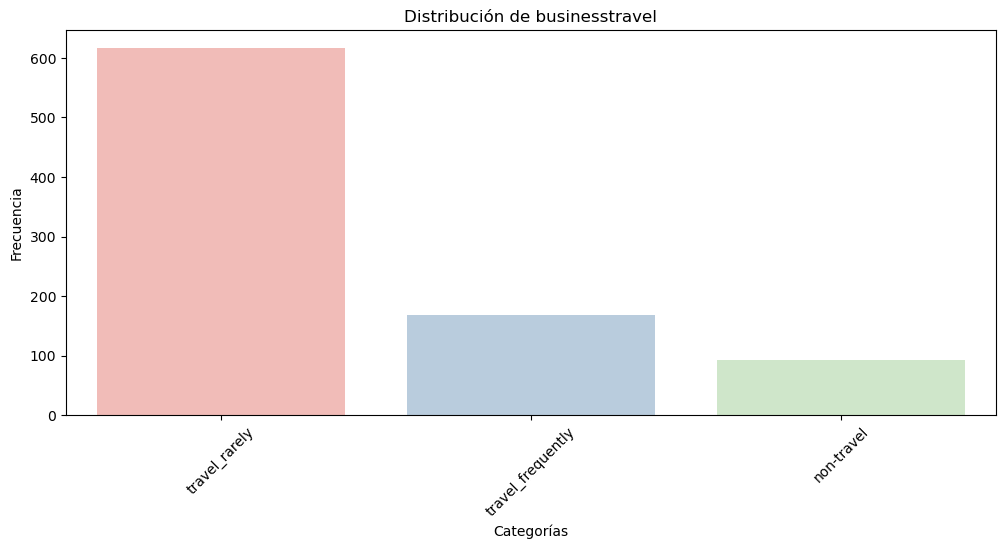

c:\Users\apdue\anaconda3\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


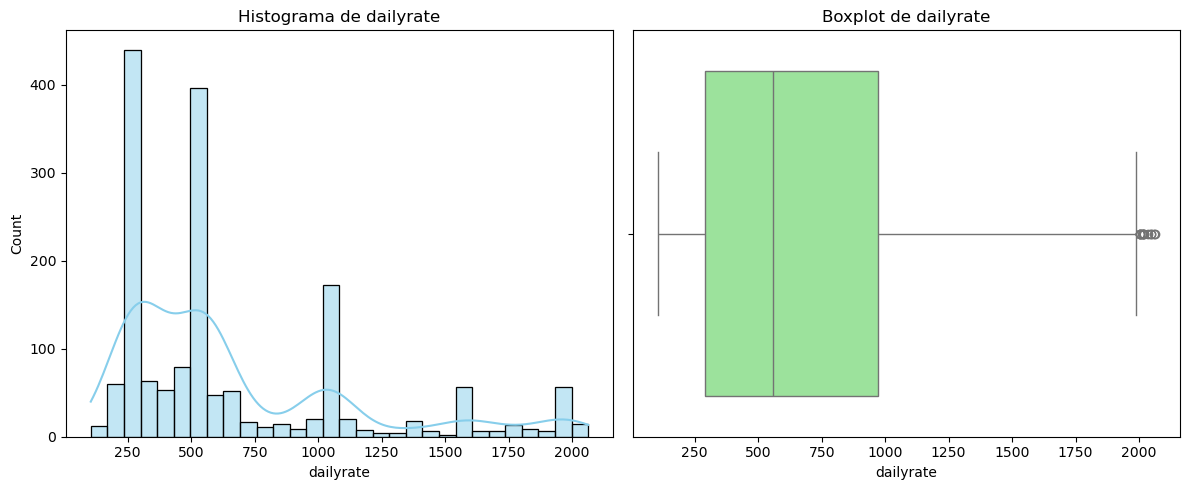

C:\Users\apdue\AppData\Local\Temp\ipykernel_22272\425956999.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Pastel1")


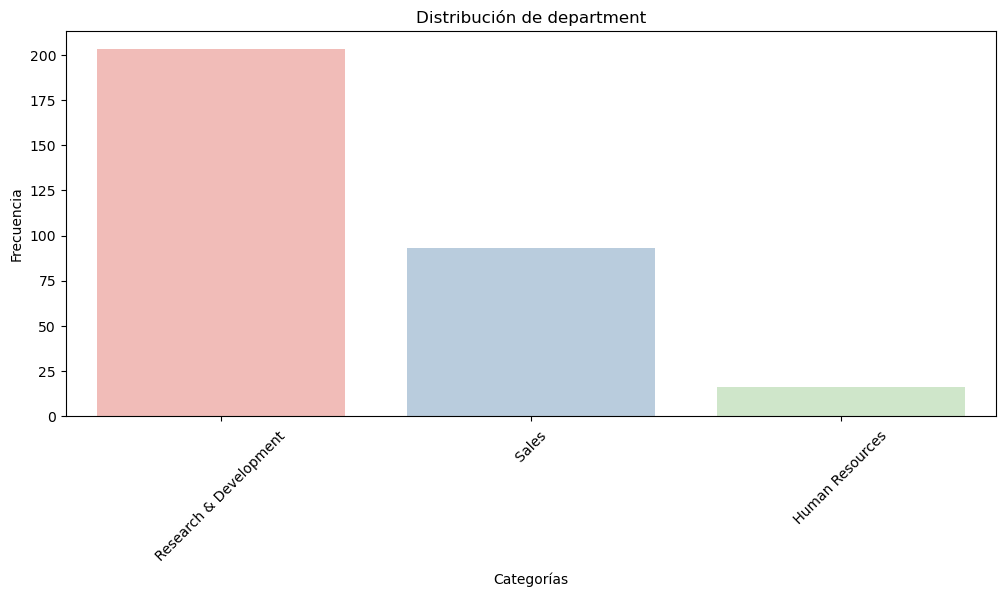

c:\Users\apdue\anaconda3\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


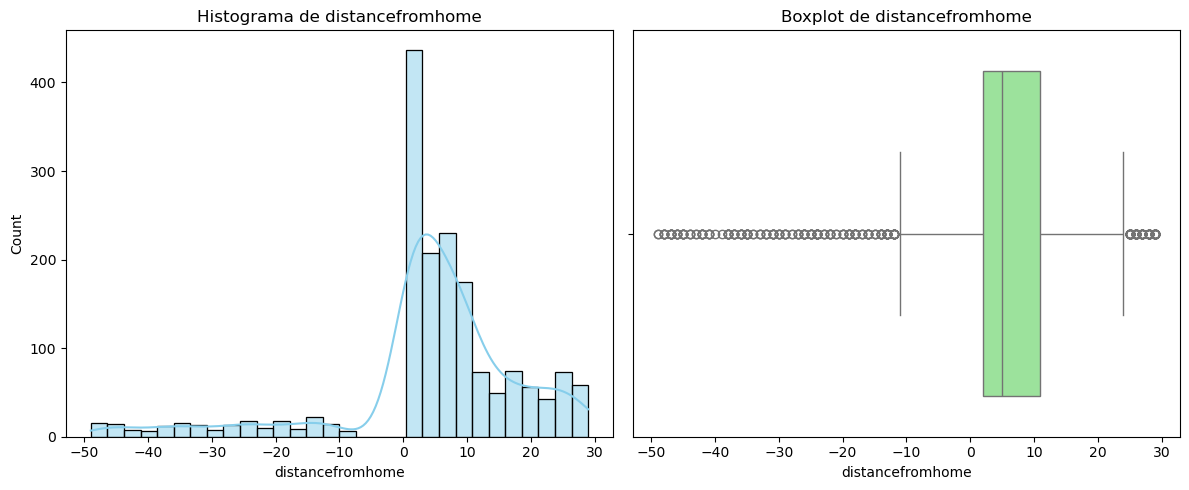

c:\Users\apdue\anaconda3\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


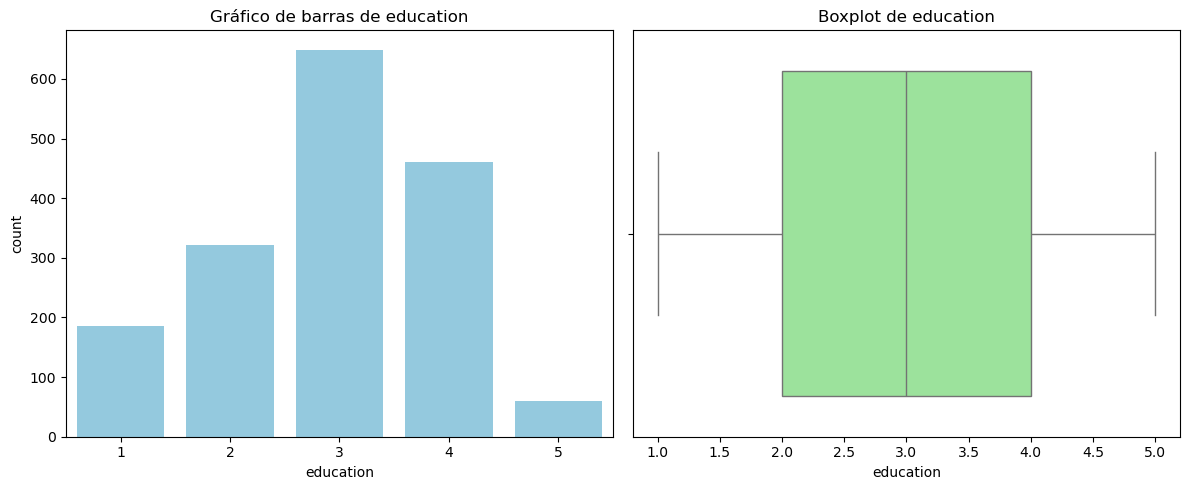

C:\Users\apdue\AppData\Local\Temp\ipykernel_22272\425956999.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Pastel1")


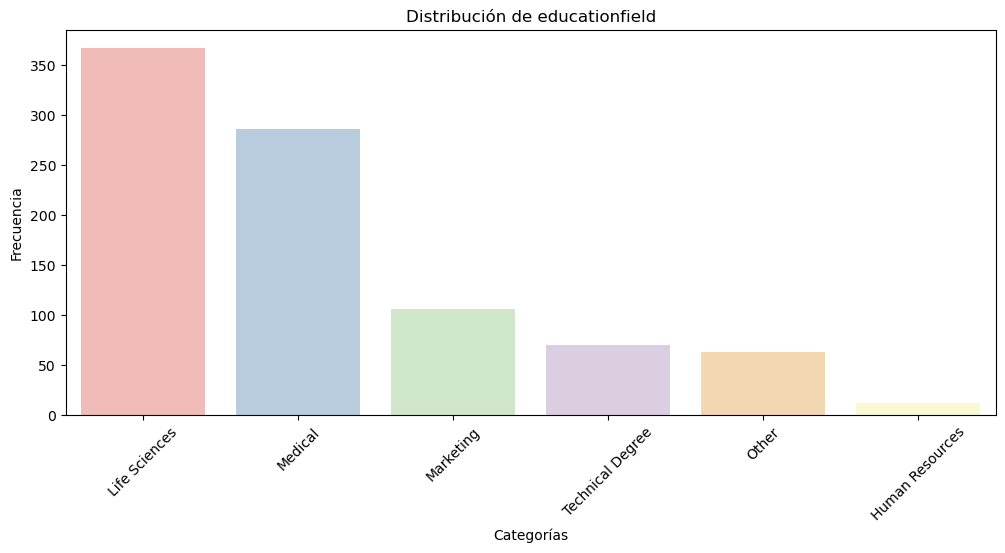

c:\Users\apdue\anaconda3\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


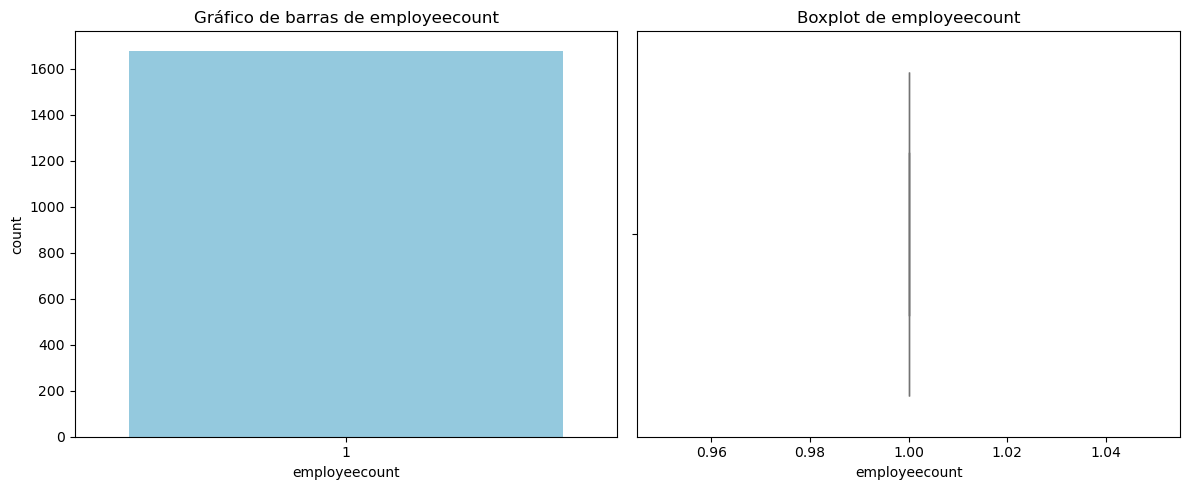

c:\Users\apdue\anaconda3\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


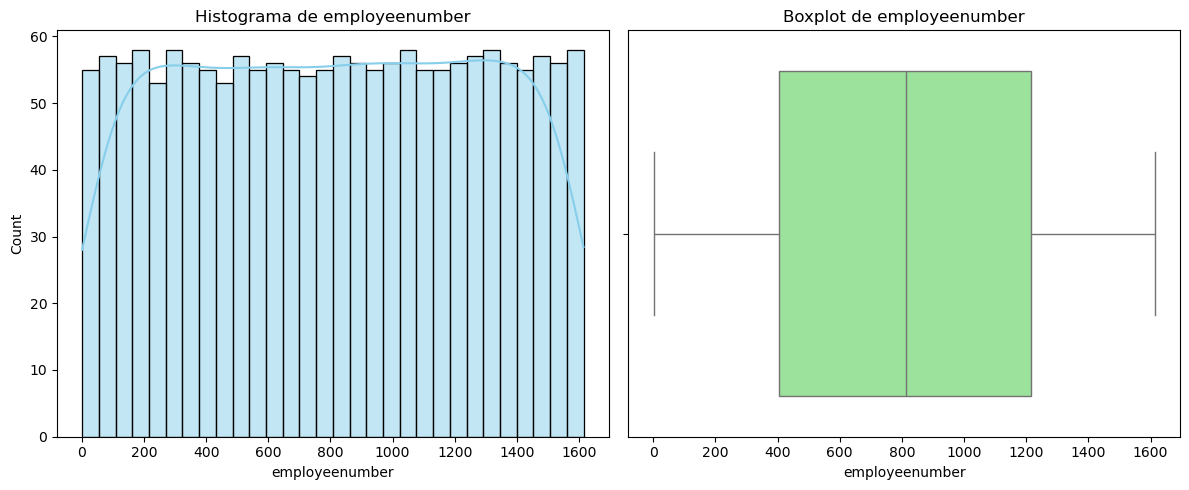

c:\Users\apdue\anaconda3\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


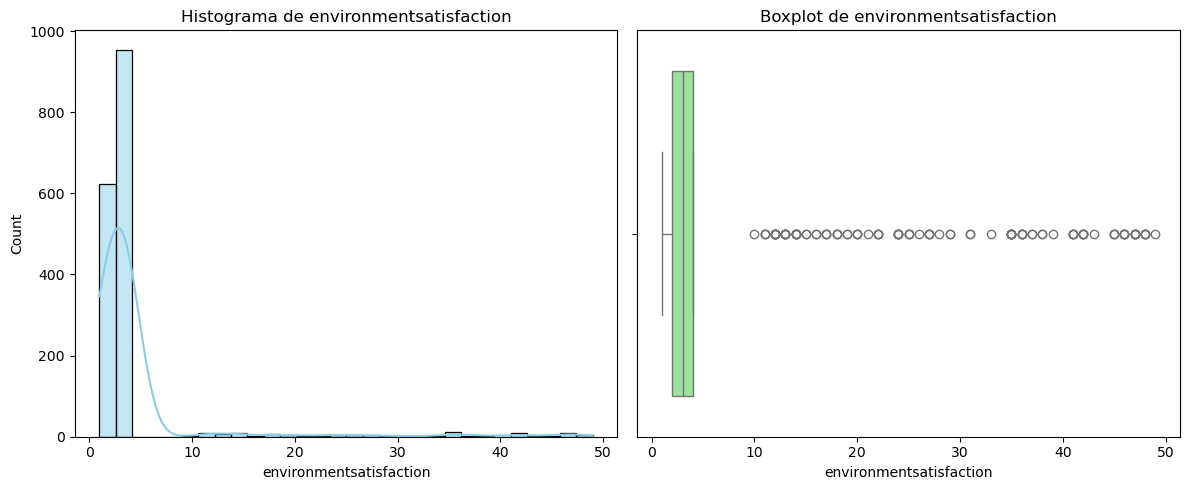

c:\Users\apdue\anaconda3\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


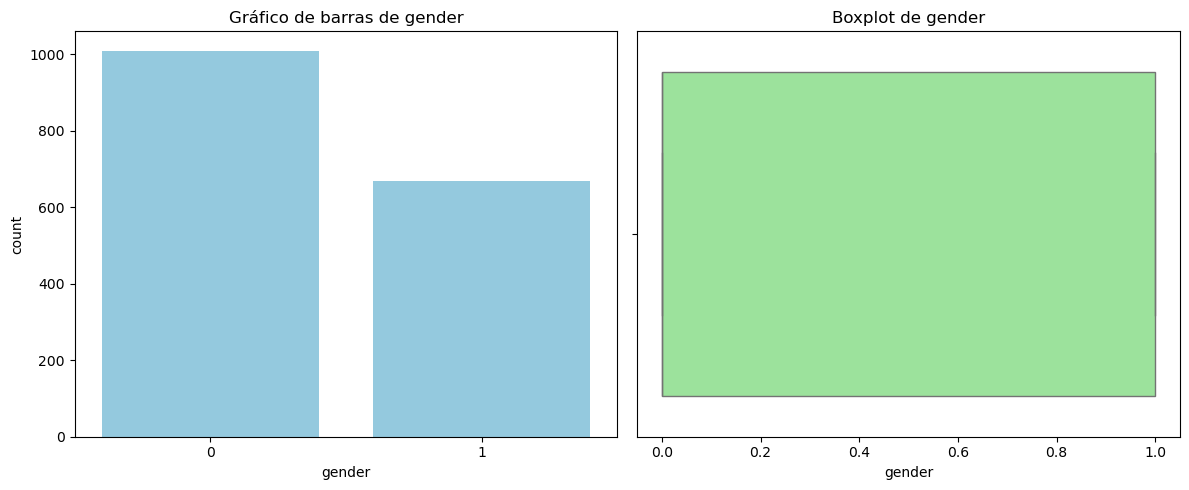

c:\Users\apdue\anaconda3\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


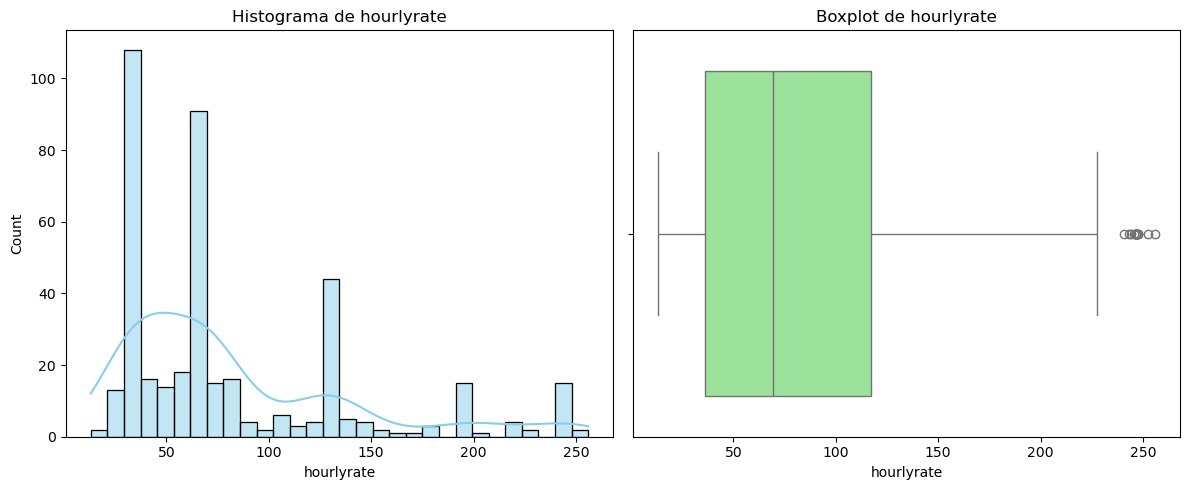

c:\Users\apdue\anaconda3\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


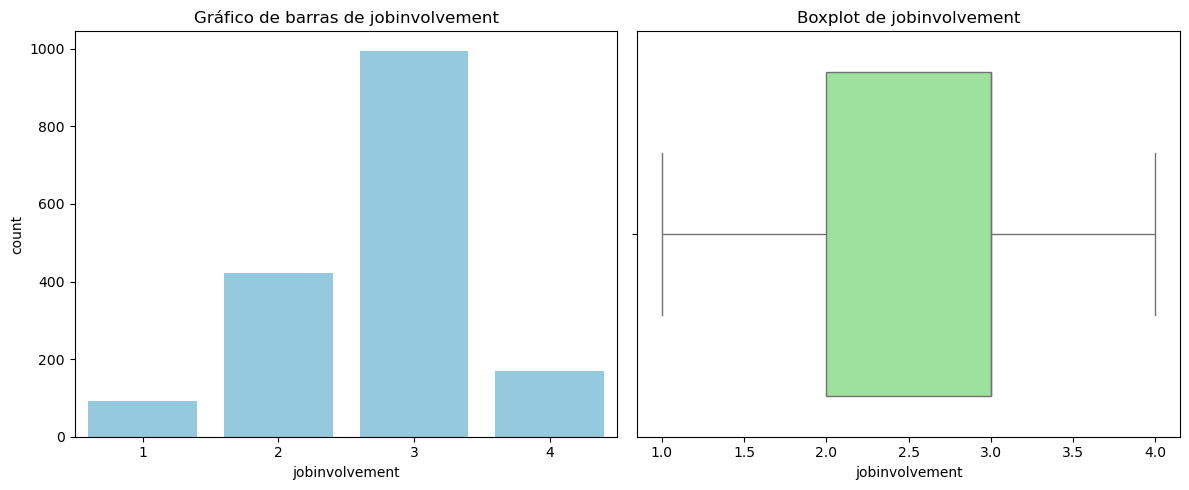

c:\Users\apdue\anaconda3\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


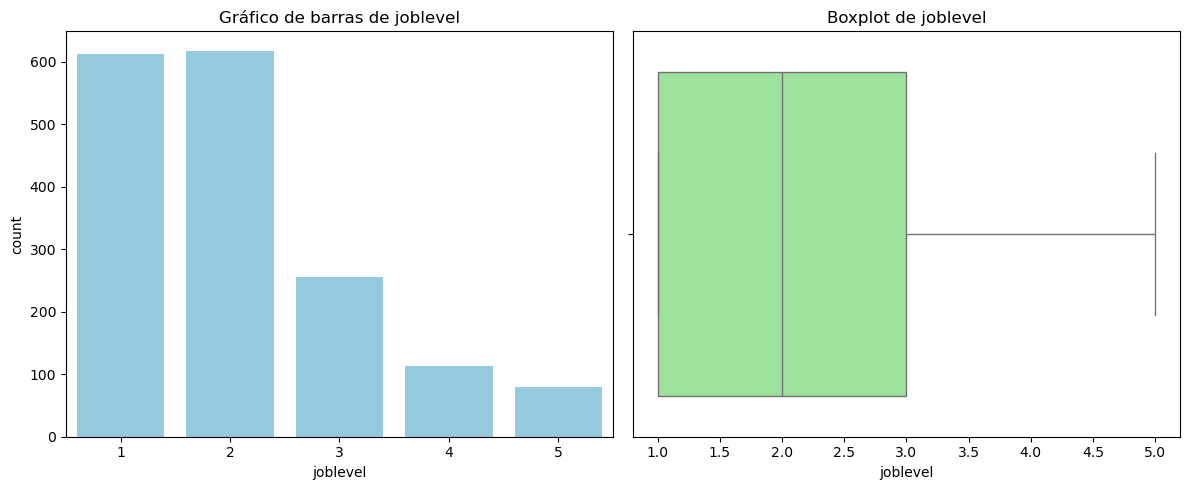

C:\Users\apdue\AppData\Local\Temp\ipykernel_22272\425956999.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Pastel1")


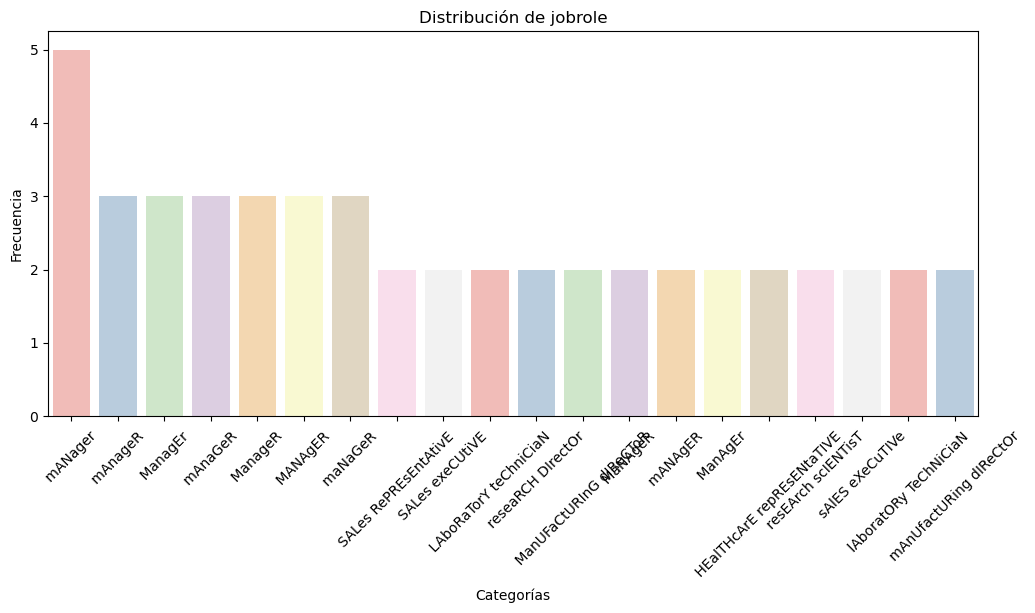

c:\Users\apdue\anaconda3\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


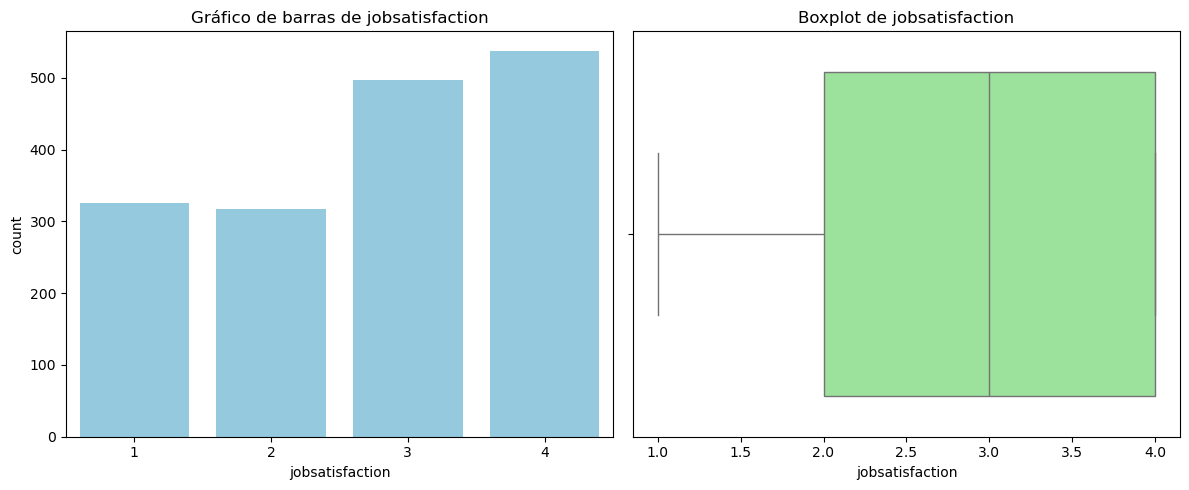

C:\Users\apdue\AppData\Local\Temp\ipykernel_22272\425956999.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Pastel1")


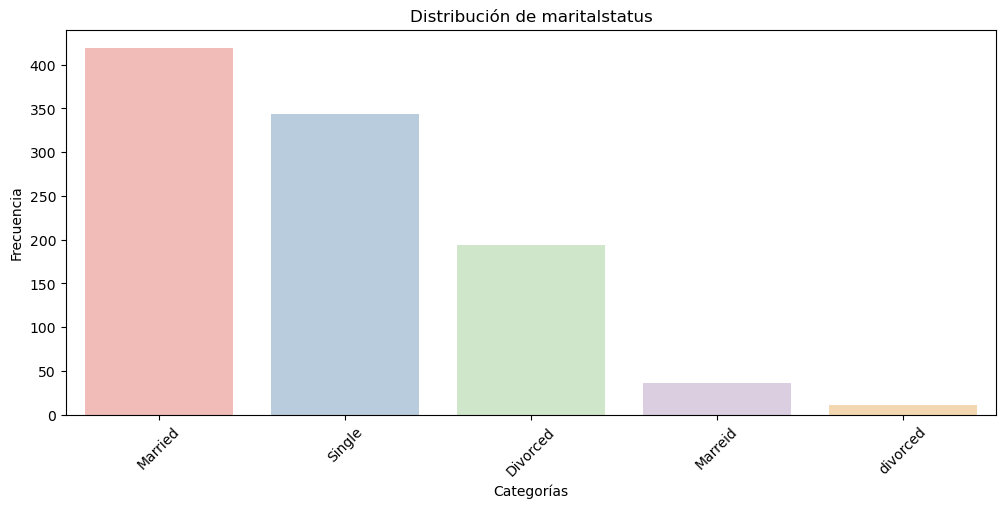

C:\Users\apdue\AppData\Local\Temp\ipykernel_22272\425956999.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Pastel1")


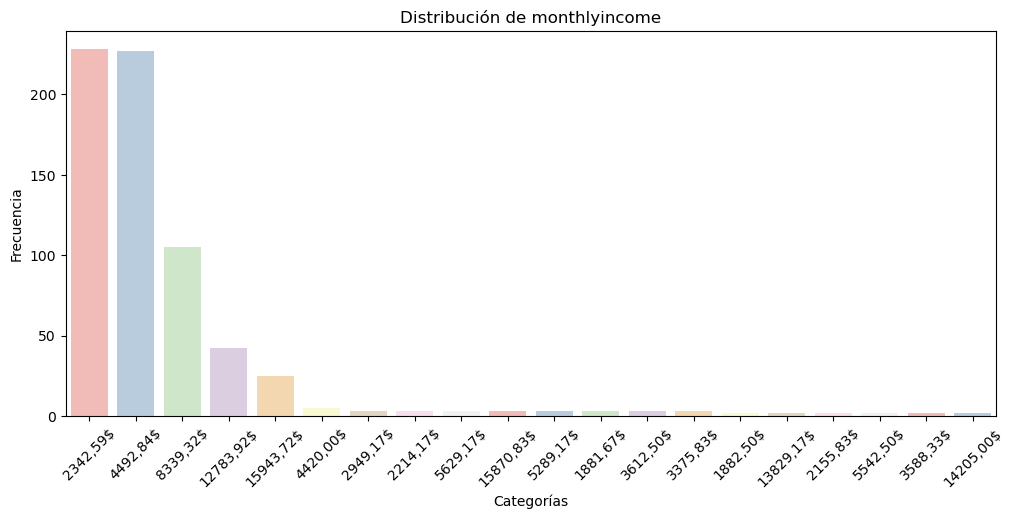

C:\Users\apdue\AppData\Local\Temp\ipykernel_22272\425956999.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Pastel1")


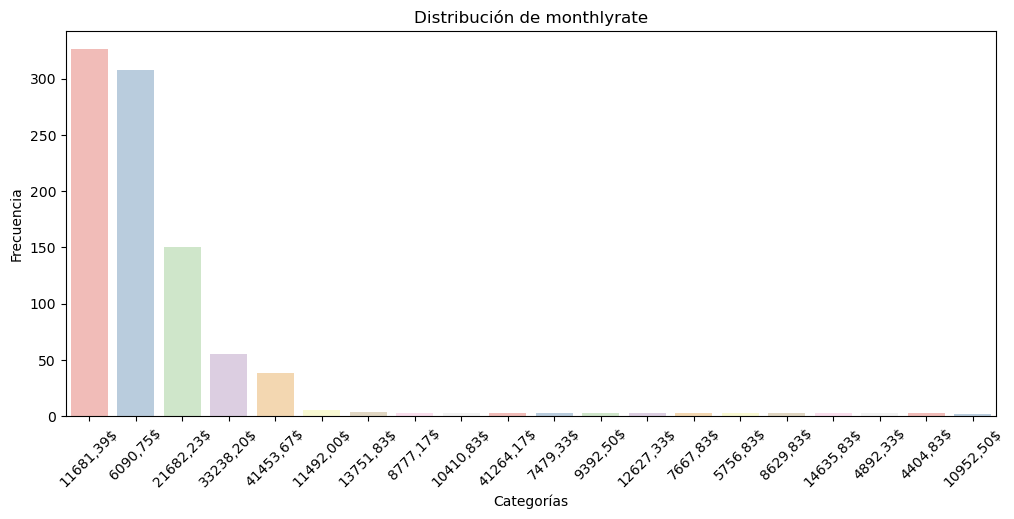

c:\Users\apdue\anaconda3\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


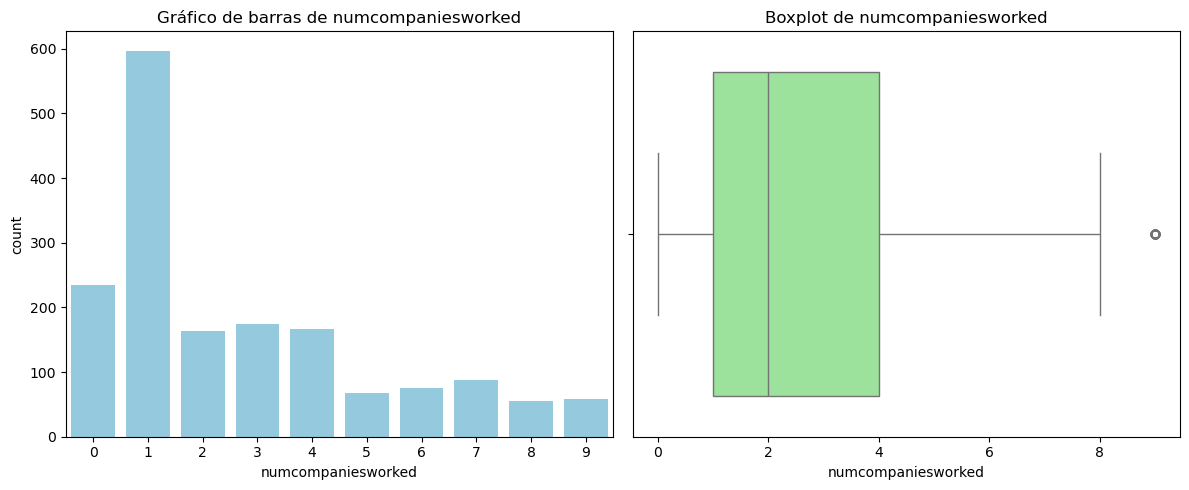

C:\Users\apdue\AppData\Local\Temp\ipykernel_22272\425956999.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Pastel1")


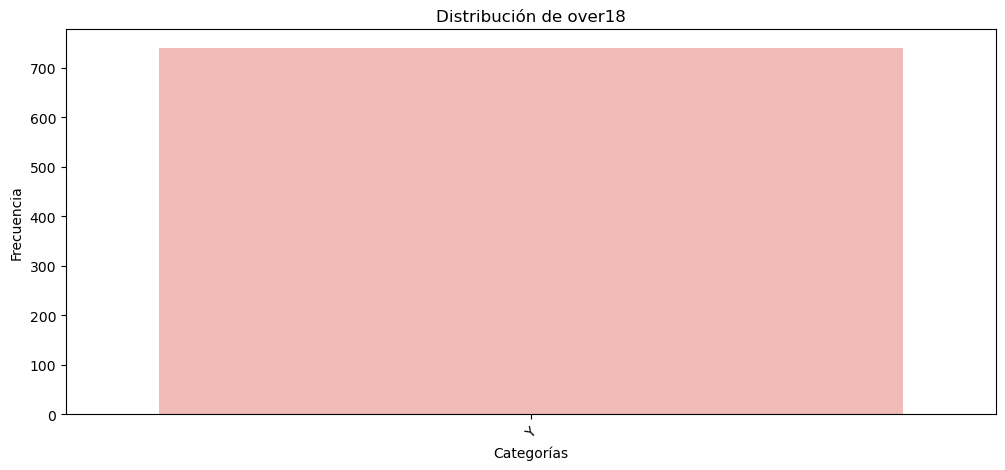

C:\Users\apdue\AppData\Local\Temp\ipykernel_22272\425956999.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Pastel1")


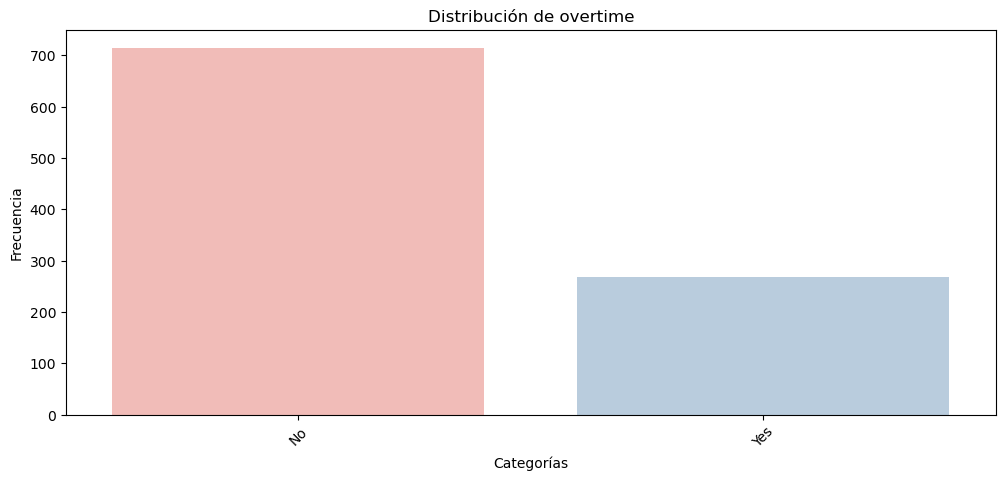

c:\Users\apdue\anaconda3\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


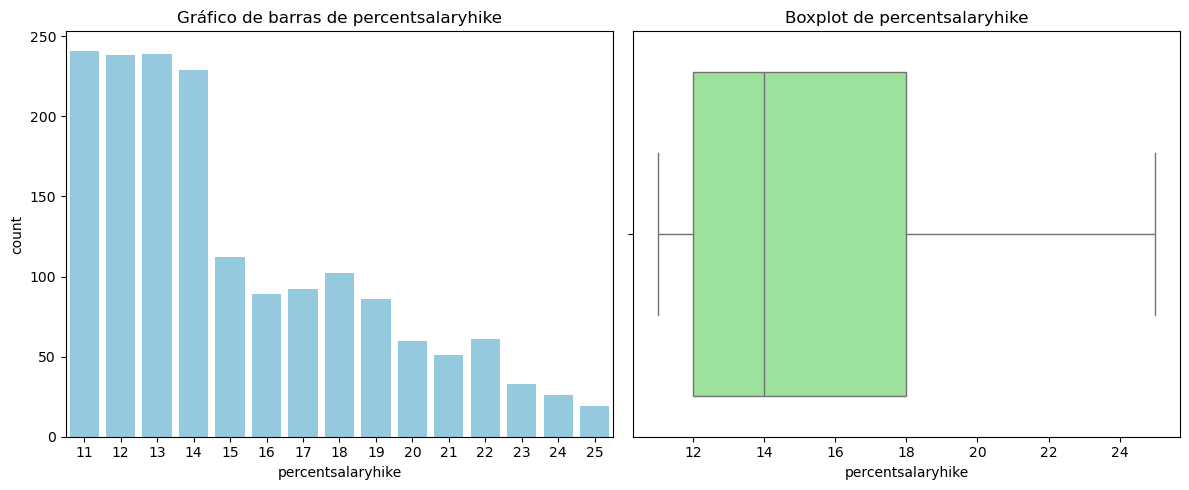

C:\Users\apdue\AppData\Local\Temp\ipykernel_22272\425956999.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Pastel1")


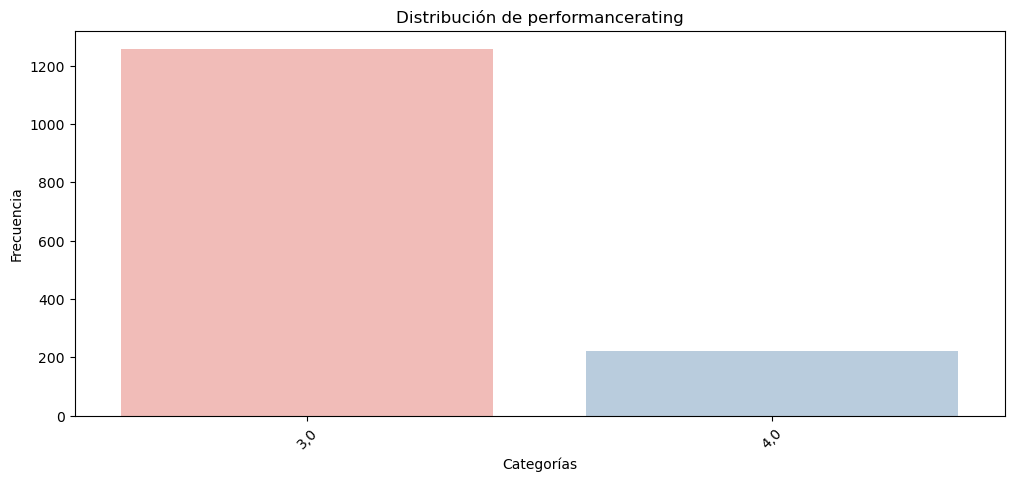

c:\Users\apdue\anaconda3\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


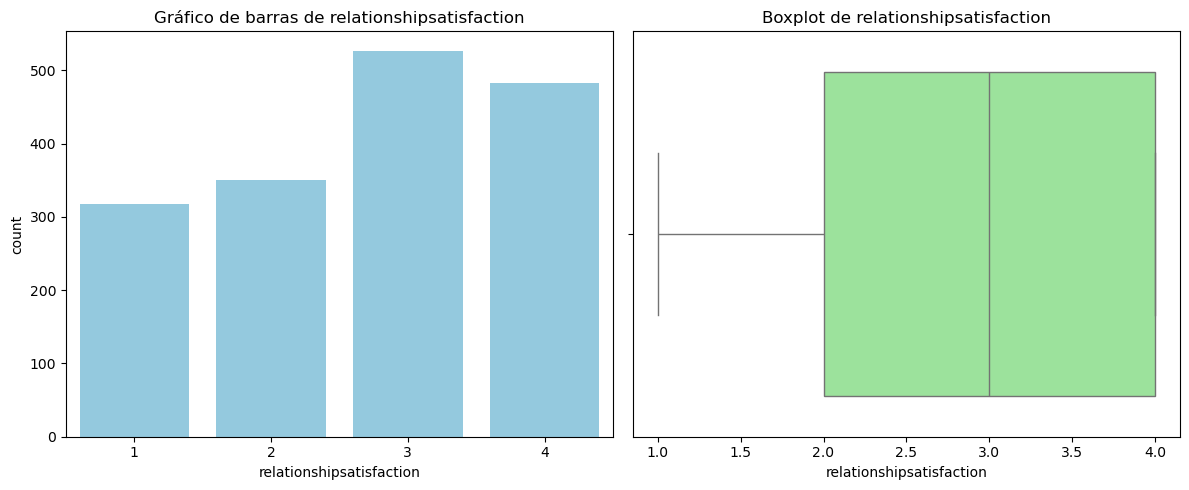

C:\Users\apdue\AppData\Local\Temp\ipykernel_22272\425956999.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Pastel1")


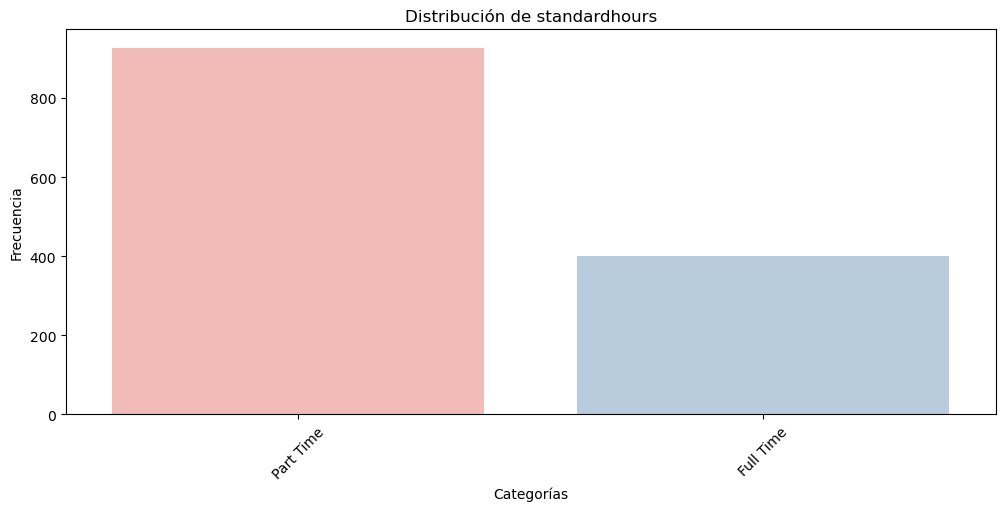

c:\Users\apdue\anaconda3\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


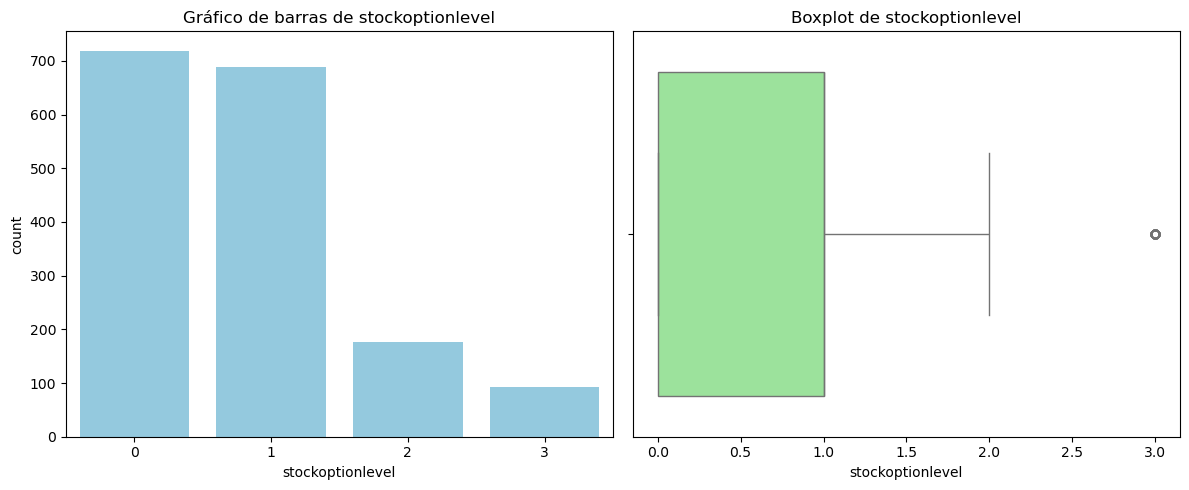

C:\Users\apdue\AppData\Local\Temp\ipykernel_22272\425956999.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Pastel1")


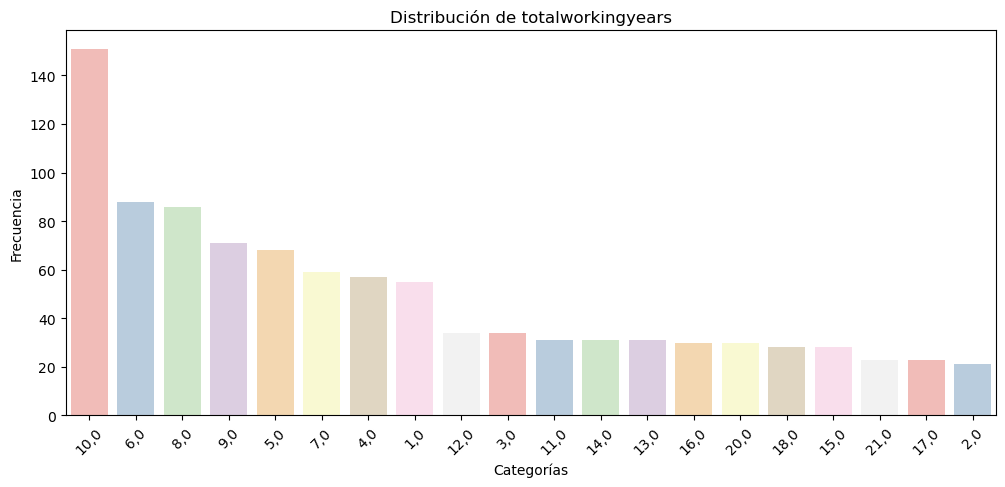

c:\Users\apdue\anaconda3\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


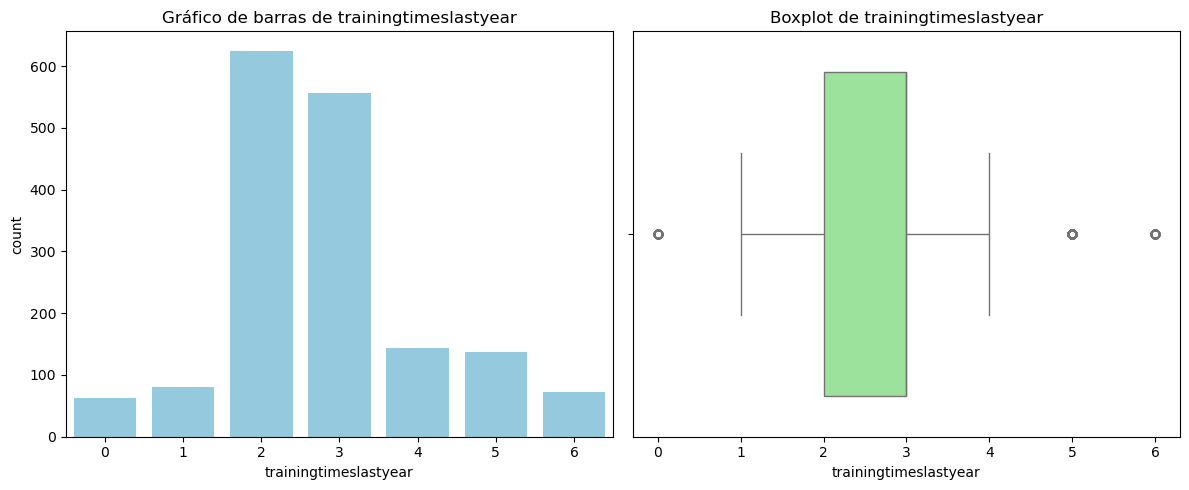

C:\Users\apdue\AppData\Local\Temp\ipykernel_22272\425956999.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Pastel1")


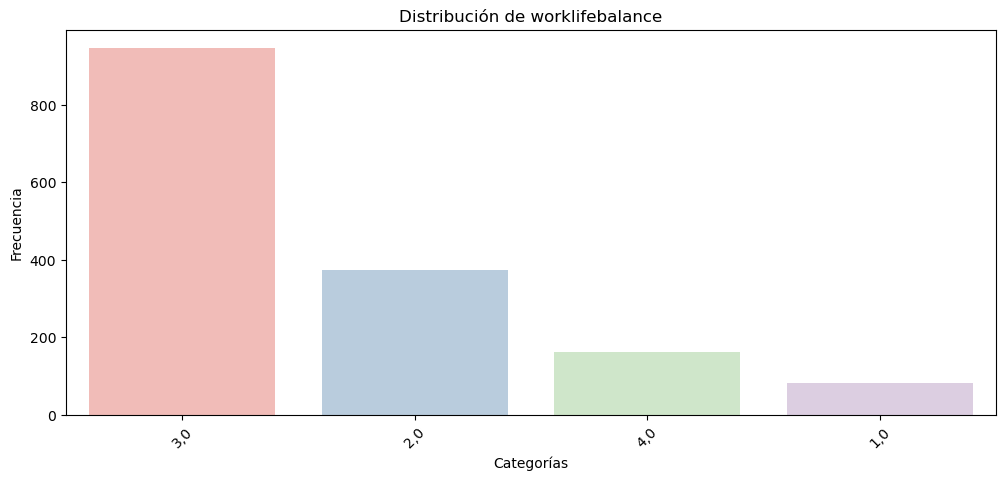

c:\Users\apdue\anaconda3\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


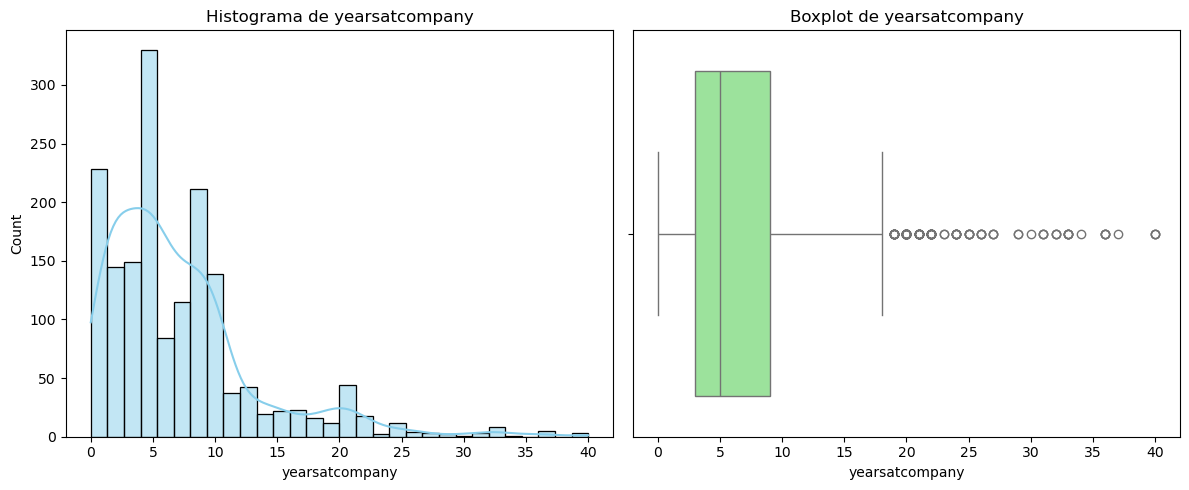

C:\Users\apdue\AppData\Local\Temp\ipykernel_22272\425956999.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Pastel1")


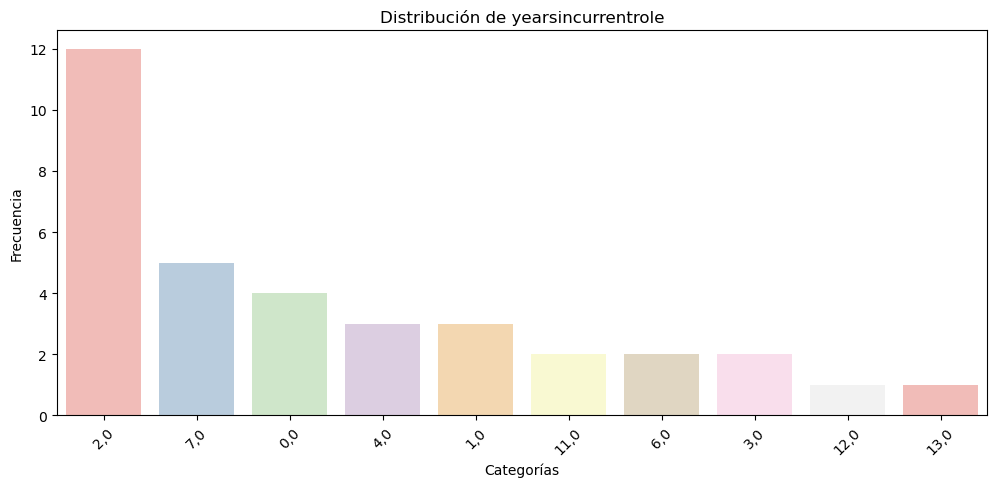

c:\Users\apdue\anaconda3\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


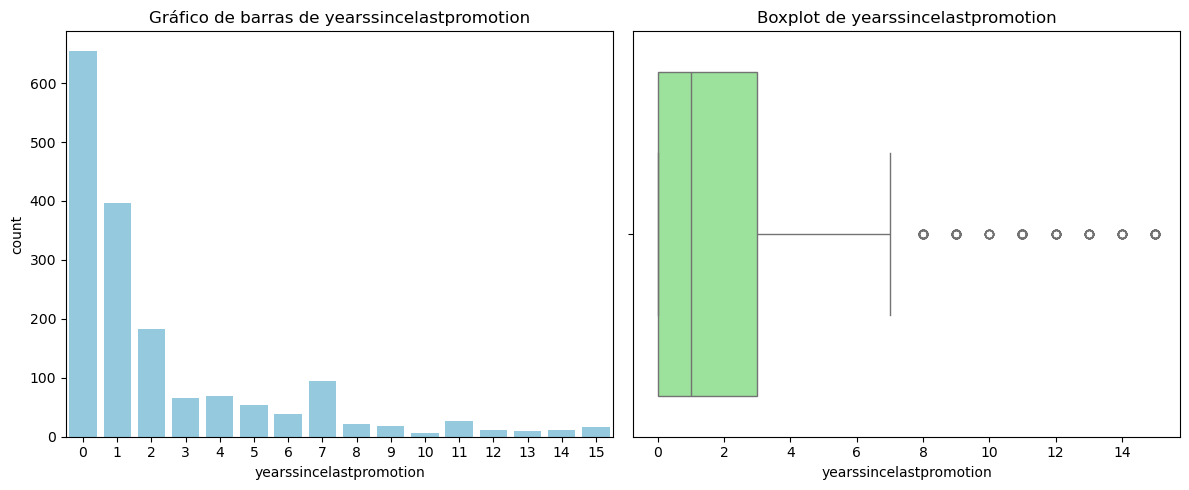

c:\Users\apdue\anaconda3\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


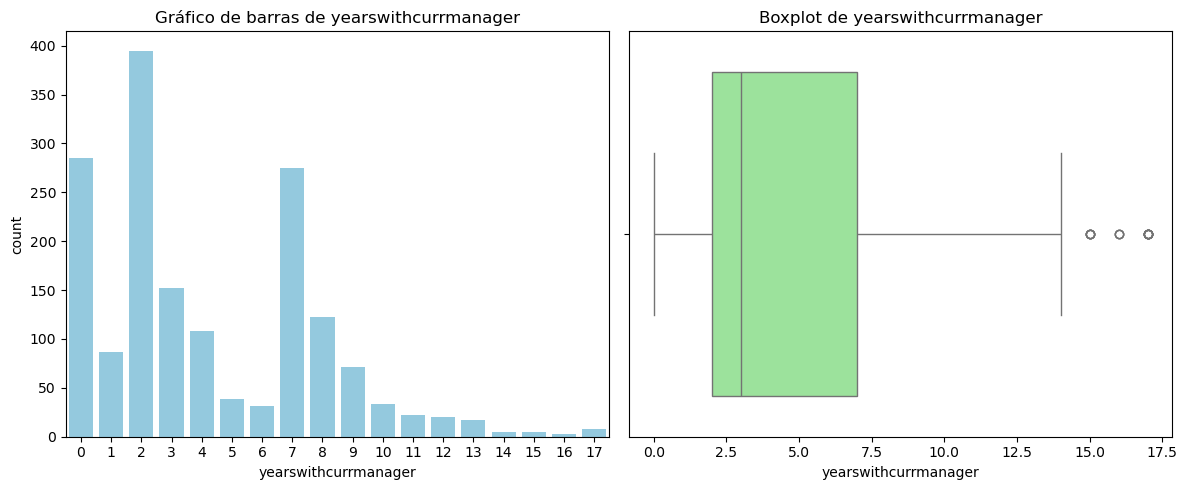

C:\Users\apdue\AppData\Local\Temp\ipykernel_22272\425956999.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Pastel1")


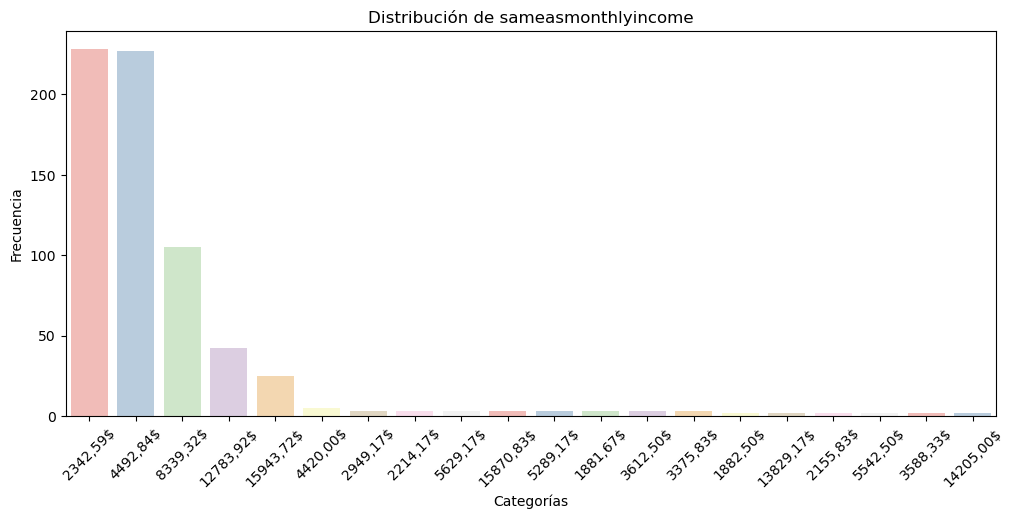

c:\Users\apdue\anaconda3\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


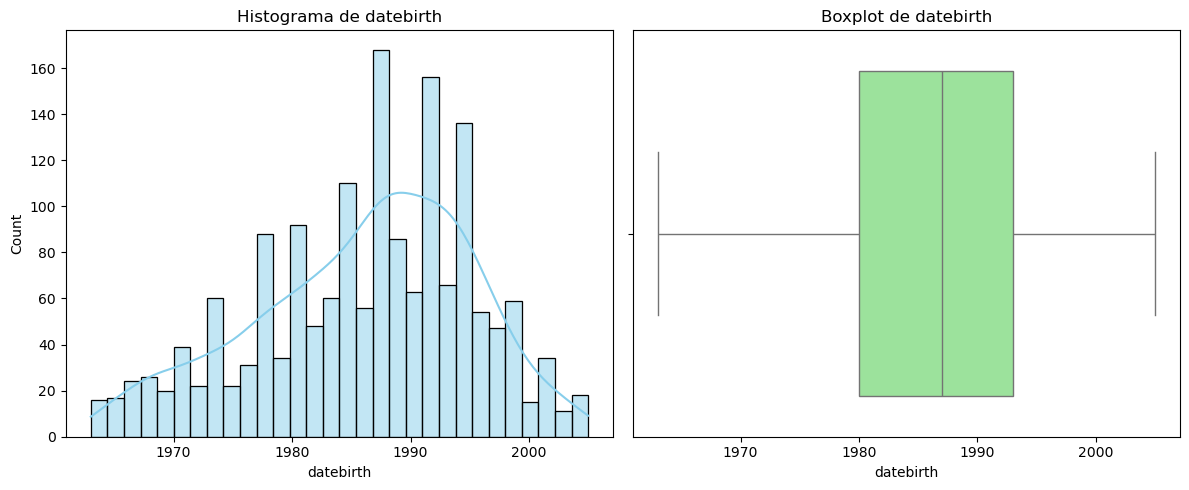

C:\Users\apdue\AppData\Local\Temp\ipykernel_22272\425956999.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Pastel1")


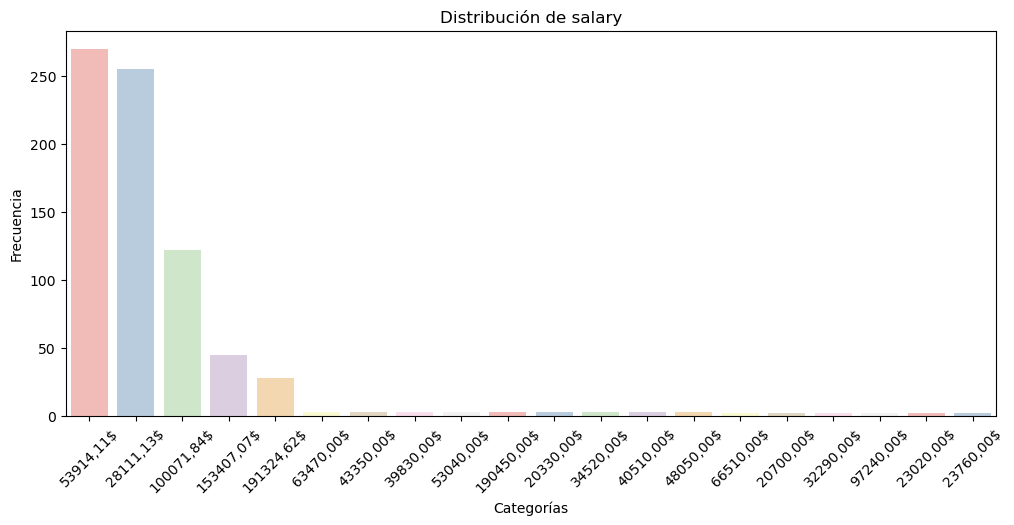

C:\Users\apdue\AppData\Local\Temp\ipykernel_22272\425956999.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Pastel1")


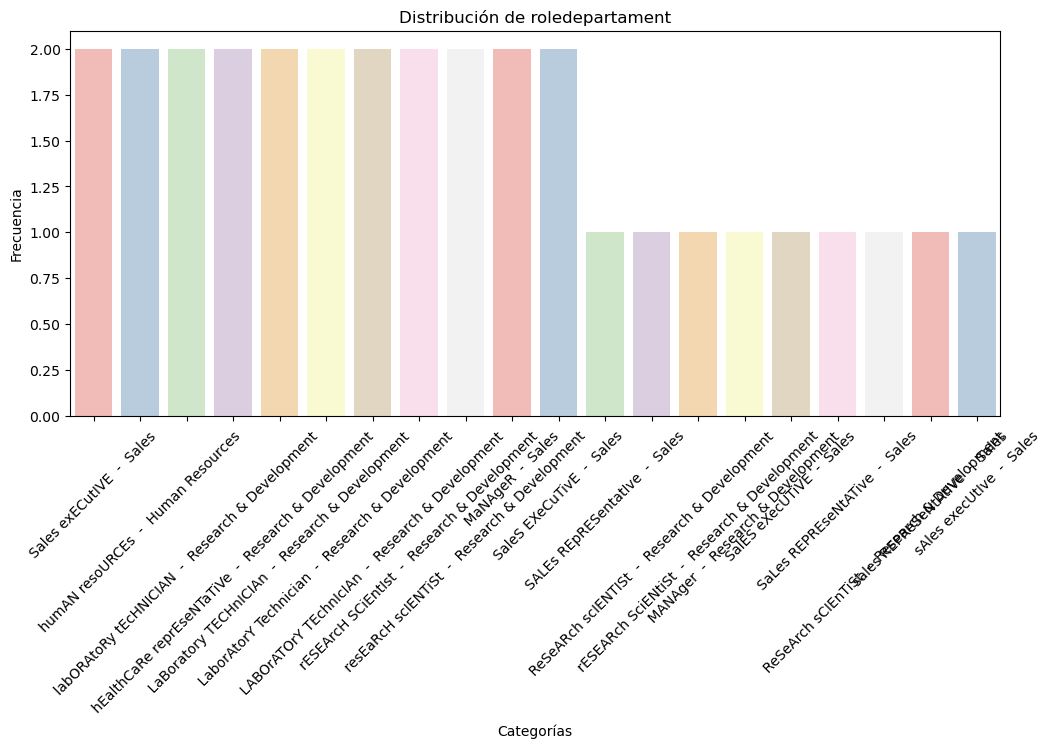

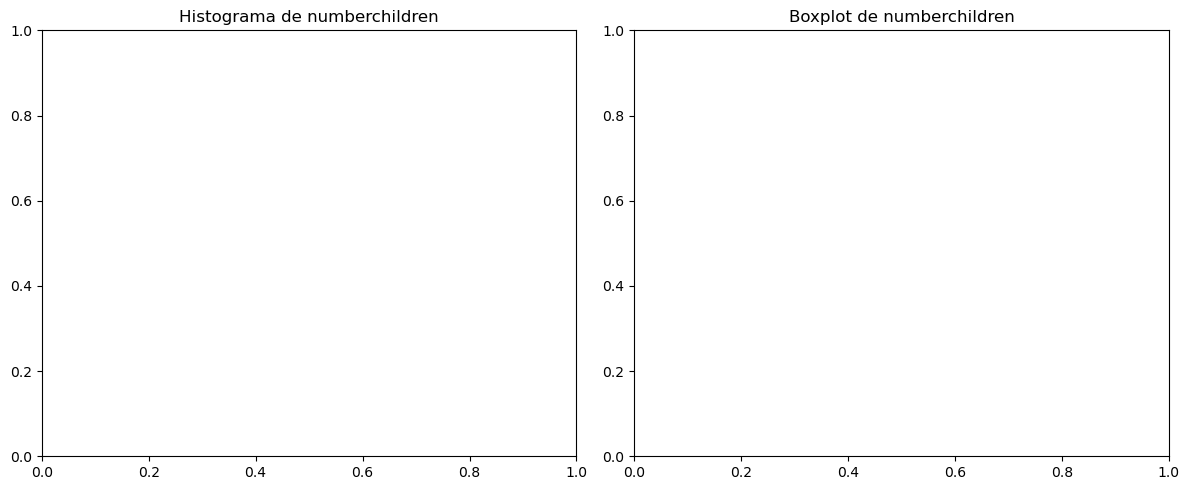

C:\Users\apdue\AppData\Local\Temp\ipykernel_22272\425956999.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Pastel1")


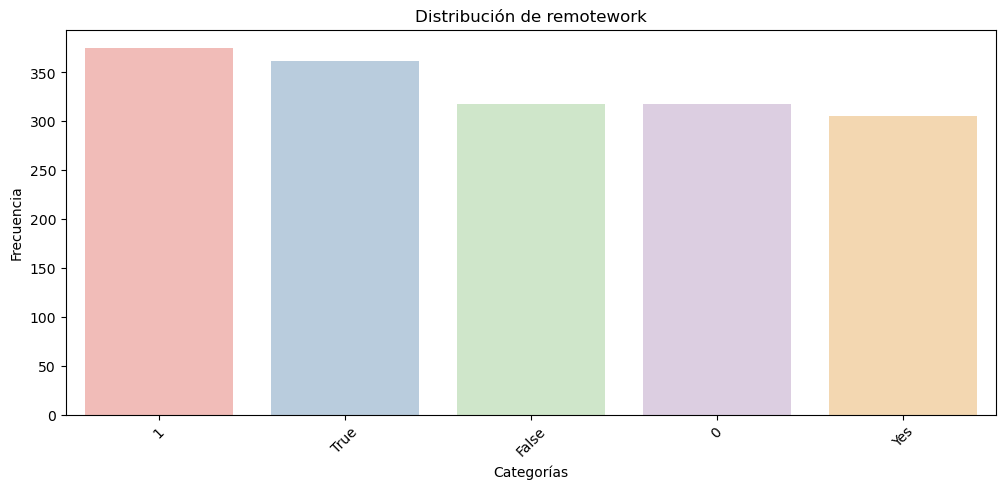

In [18]:
graficar_columna(df_limpio, col=None) #visualizar todas las columnas del dataframe, tanto numéricas como categóricas

#quitar los warnings

#### PRESENCIA DE OUTLIERS

A continuación, la siguiente función detecta outliers en las columnas:

In [12]:
def detectar_outliers(df, k=1.5):
    """
    Detecta outliers en columnas numéricas usando la regla de Tukey.
    Devuelve:
      - resumen: DataFrame con nº y % de outliers por columna
      - outliers: diccionario {columna: filas outlier}
    """
    num_cols = df.select_dtypes(include="number").columns
    resumen = []
    outliers = {}

    for col in num_cols:
        serie = df[col].dropna()
        Q1, Q3 = serie.quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower, upper = Q1 - k*IQR, Q3 + k*IQR

        mask = (df[col] < lower) | (df[col] > upper)
        n_out = mask.sum()
        pct_out = round(n_out / len(df) * 100, 2)

        resumen.append({"Columna": col, "Outliers": n_out, "% Outliers": pct_out})
        if n_out > 0:
            outliers[col] = df[mask]

    resumen_df = pd.DataFrame(resumen).sort_values("% Outliers", ascending=False)
    return resumen_df, outliers

In [13]:
resumen, outliers_dict = detectar_outliers(df_limpio)

In [14]:
# Ver resumen general de outliers en las columnas numéricas 
print(resumen)

                     Columna  Outliers  % Outliers
1           distancefromhome       299       17.82
15     trainingtimeslastyear       272       16.21
17   yearssincelastpromotion       123        7.33
16            yearsatcompany       118        7.03
5    environmentsatisfaction       102        6.08
14          stockoptionlevel        93        5.54
11        numcompaniesworked        59        3.52
7                 hourlyrate        17        1.01
18      yearswithcurrmanager        16        0.95
0                  dailyrate        14        0.83
4             employeenumber         0        0.00
2                  education         0        0.00
3              employeecount         0        0.00
12         percentsalaryhike         0        0.00
10           jobsatisfaction         0        0.00
9                   joblevel         0        0.00
8             jobinvolvement         0        0.00
6                     gender         0        0.00
13  relationshipsatisfaction   

Vamos a ir haciendo un análisis detallado de la presencia de outliers de cada una de las columnas numéricas en base al porcentaje de los mismos, y apoyándonos para ello en los boxplots de dichos datos y de forma complementaria en el histograma según los casos. 

### 1. Columna distancefromhome

Esta columna proporciona la distancia en millas o kilómetros desde el hogar al trabajo. Es la que mayor porcentaje de outliers presenta, un 17,82 %.

c:\Users\apdue\anaconda3\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


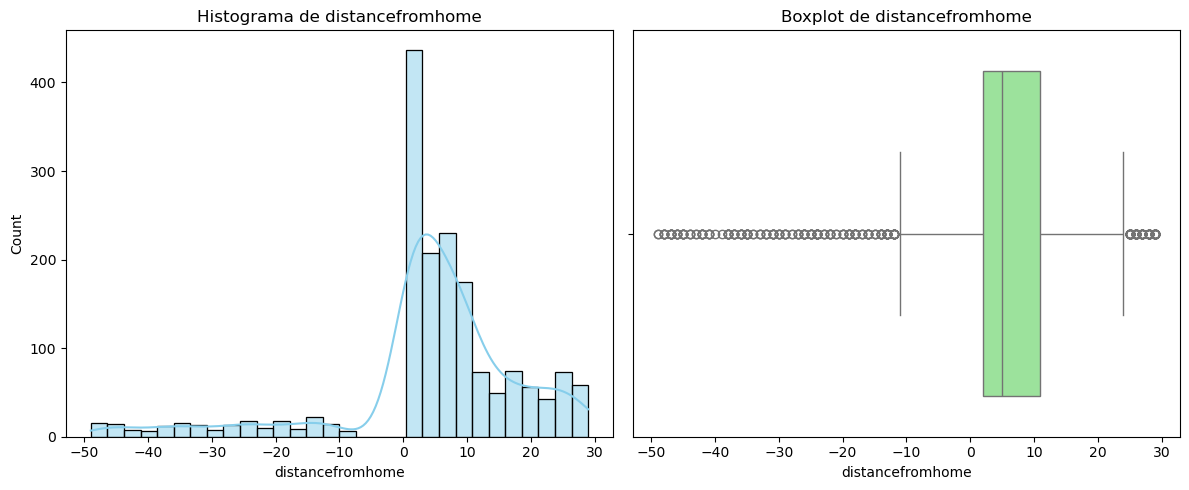

In [82]:
graficar_columna(df_limpio, col="distancefromhome")

La mayoría de los empleados vive relativamente cerca del trabajo (≤15).

La distribución del histograma es asimétrica hacia la derecha, de manera que la mayor parte de los empleados viven a menos de 15 km/ millas aproximadamente del trabajo. Se produce un pico muy alto en distancias de aproximadamente menos de 5 km/ millas del trabajo y que probablemente es la distancia más común. La cola hacia la derecha muestra que algunos pocos viajeros tienen sus casas más lejos del trabajo, distancias de 20 - 30 km/ millas.


Además, observando el histograma se hace evidente un claro error en los datos. Las distancias reales no pueden ser negativas. De manera que se resalta la evidencia de que se trata de valores que deben eliminarse o corregirse. Se optará por corregirlos, pues lo más lógico es que se trate de valores que en términos absolutos sean coherentes.


Por su parte, atendiendo a la representación del boxplot, la caja (IQR) indica que el 50% central de empleados viven entre aproximadamente 3 y 12 km/ millas del trabajo. 

La mediana estaría aproximadamente cerca de 8 km/ millas, por lo que la mitad vive a menos de esa distancia, y los outliers a la derecha representan personas que viven a distancias más largas del trabajo, los 20 - 30 km/ millas comentados anteriormente en la descripción del histograma. 


Los puntos a la izquierda de la caja en el boxplot son datos erróneos, son negativos y no son outliers. 


Cabe destacar que desde la óptica de abandono de puestos, este tipo de variables puede ser un factor clave, ya que a mayores distancias, mayor estrés etc. 

##### Tratamiento Outliers columna distancefromhome

Si observamos los resultados obtenidos anteriormente en el EDA, la columna dailyrate no tenía ningún valor nulo, por lo que no hay que recurrir a un análisis más detallado de cara a una posible imputación de nulos. 

### 2. Columna trainingtimeslastyear




Esta columna hace referencia al número de sesiones de entrenamiento en el último año. Es la segunda columna con mayor porcentaje de outliers, un 16,21 %.

c:\Users\apdue\anaconda3\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


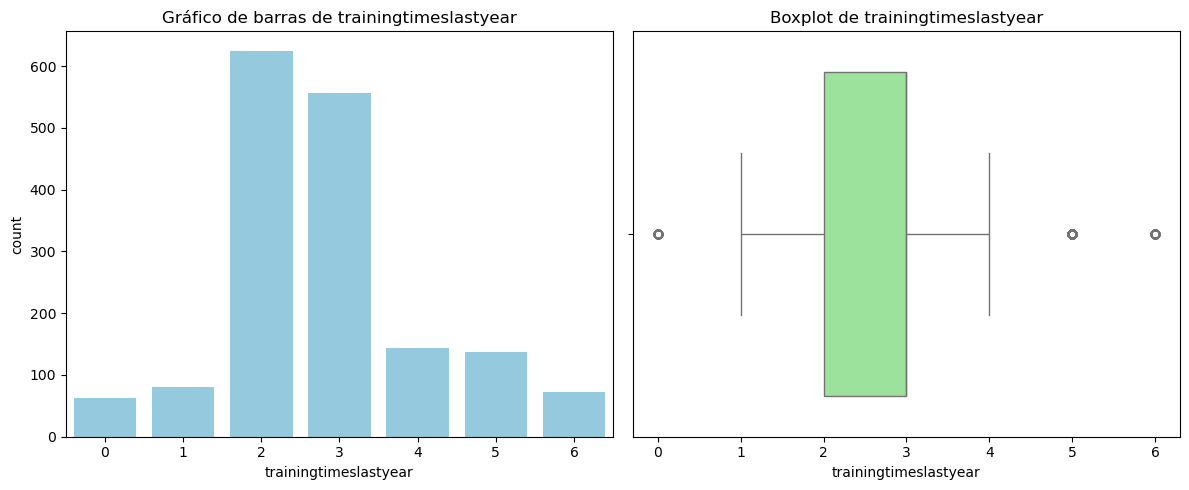

In [84]:
graficar_columna(df_limpio, col="trainingtimeslastyear")

En el gráfico de barras, el eje X representa el número de entrenamientos recibidos de 0 hasta 6.

El eje Y representa la cantidad de empleados en cada categoría, o sea la correspondencia entre empleados y número de entrenamientos. 

La mayoría de los empleados recibieron 2 ó 3 entrenamientos como se observa de las barras más altas.

El número de personas con entrenamientos de 0, 1, 4, 5, 6 es bastante menor.


Por su parte, la caja del boxplot, representa el rango  entre el primer cuartil (Q1 ≈ 2) y el tercer cuartil (Q3 ≈ 3), siendo la línea de dentro de la caja, la mediana. 

Los bigotes del boxplot en este caso, se extienden desde el valor mínimo de 1 hasta el máximo dentro del rango , 4. 


Los puntos fuera de los bigotes son los outliers que en este caso, son los valores, 0, 5 y 6 los que aparecen como atípicos al estar alejados del rango intercuartílico. 


Esta columna no tiene nulos por lo que no habrá que proceder posteriormente a ninguna imputación de nulos. 

##### Tratamiento Outliers columna trainingtimeslastyear

En cuanto a estos outliers, y partiendo de la base de que estos datos son correctos, pues nada apunta a que no lo sean, creemos que lo más prudente es dejarlos y tenerlos en cuenta para el análisis, pues al fin y al cabo representan empleados con distintas situaciones. 



### 3. Columna yearssincelastpromotion

Esta columna proporciona información de los años desde la última promoción recibida.

c:\Users\apdue\anaconda3\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


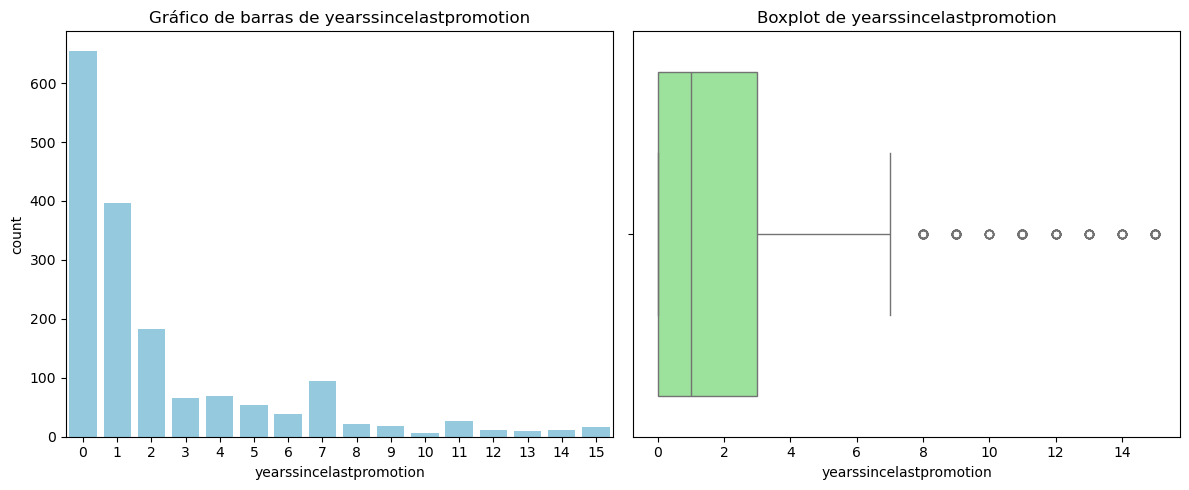

In [85]:
graficar_columna(df_limpio, col="yearssincelastpromotion")

En el gráfico de barras, en el eje X, se representa el número de años desde la última promoción de 0 a 15. 
En el eje Y, el número de empleados en cada categoría.

Según este gráfico, la mayor parte de los años o no han promocionado nunca o lo están muy recientemente, porque la barra más alta de todo el gráfico se corresponde con 0 años desde la última promoción.  Hay un gran sesgo hacia la derecha.

Hay un grupo relevante que se corresponde con 1 año desde la última promoción y otro , aunque con mucha menor relevancia, que se corresponde con 2 años desde la última promoción. 

A medida que aumentan los años desde la última promoción, el número de empleados disminuye de forma drástica, con un pequeño pico a los 7 años con respecto a los años contiguos. A partir de este pico, los valores de empleados promocionados son muy escasos.



La caja verde del Boxplot, muestra el rango entre el primer cuartil (Q1 ≈ 0) y el tercer cuartil (Q3 ≈ 3–4) y la línea dentro de la caja es la mediana, que se corresponde aproximadamente con 1 año.

Se observa que los bigotes se extienden aproximadamente hasta los 7 años. 

Los puntos a la derecha, del 8 al 15 son outliers pues están bastante alejados de la mayoría. 


De este gráfico podría desprenderse una conclusión importante, relacionada con el estancamiento profesional de los empleados con el tiempo, factor clave influyente en que los empleados abandonen la empresa. 


Esta columna no tiene nulos por lo que no habrá que proceder posteriormente a ninguna imputación de nulos. 


##### Tratamiento Outliers columna yearssincelastpromotion
Desde el punto de vista de retención o satisfacción laboral, aportan gran valor informativo estos outliers por lo que sen van a mantener. Se consideran un dato relevante para nuestro análisis. 



### 4. Columna yearsatcompany  

Esta columna proporciona información acerca de los años en la empresa actual.

c:\Users\apdue\anaconda3\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


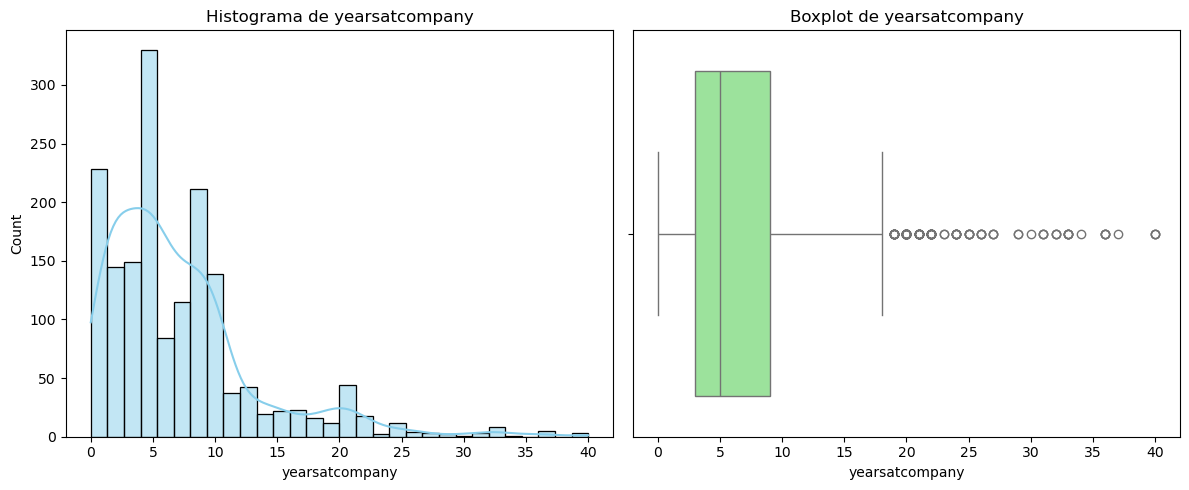

In [86]:
graficar_columna(df_limpio, col="yearsatcompany")

En el histograma, en el eje X se muestran los años en la empresa de 0 a 40 años. 
En el eje Y se muestra el número de empleados en cada rango de años.


La mayor parte de los empleados llevan entre 0 y 10 años en la empresa.
Hay un pico muy evidente a los 5 años y otro algo más bajo alrededor de los 10 años en la empresa. 

A partir de los 10 años, baja la cifra de empleados aproximadamente hasta los 20 años en la empresa donde se produce un pequeño pico respecto a esta bajada, para luego seguir en descenso hasta los 40 años. 

La curva KDE muestra una distribución suavizada claramente sesgada a la derecha.


Atendiendo al Boxplot, la caja verde cubre de Q1 ≈ 3–4 años hasta Q3 ≈ 10 años. La línea dentro de la caja se corresponde con la mediana ≈ 5 años.

Los bigotes se extienden hasta los 18 - 19 años y los puntos más allá de los 20 años, son los outliers que se corresponden con los empleados que llevan muchos años en la empresa. El valor máximo llega hasta los 40 años, con un conteo muy escaso. 


Con toda esta información, vemos un comportamiento sesgado de la gráfica donde la mayor parte de los empleados llevan menos de una década en la empresa. 


Esta columna no tiene nulos por lo que no habrá que proceder posteriormente a ninguna imputación de nulos. 


##### Tratamiento Outliers columna yearsatcompany  
Existe un grupo reducido de empleados con carreras muy largas en la empresa, de 20 a 40 años y que aunque vienen representados como outliers, son válidos pues este patrón es típico de una empresa con una rotación moderada/ alta, con un pequeño núcleo de empleados de larga permanencia en la empresa. Con lo cual, estos outliers son valores importantes que mantendremos para nuestro análisis pues representan a empleados con mucha antigüedad. No obstante, una opción podría ser agruparlos en una categoría única de larga permanencia. 




### 5. Columna environmentsatisfaction

Esta columna proporciona información sobre el nivel de satisfacción con el ambiente laboral.

c:\Users\apdue\anaconda3\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


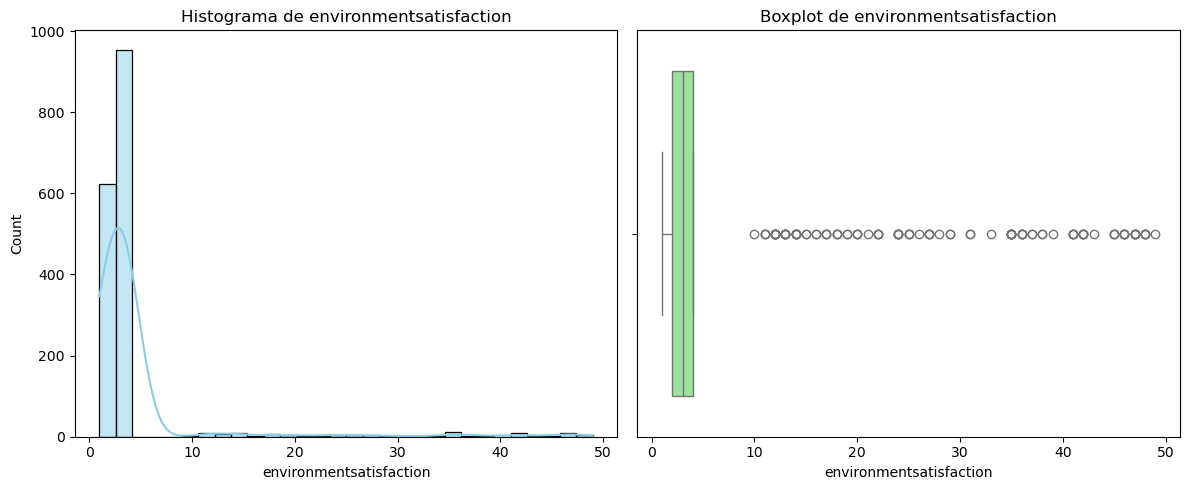

In [88]:
graficar_columna(df_limpio, col="environmentsatisfaction")

En el histograma, El eje X representa la variable environmentsatisfaction (satisfacción con el ambiente de trabajo, probablemente medida en una escala de 1 a 4), y el eje Y la frecuencia de empleados en cada nivel.

En el histograma se observa que la gran mayoría de los valores están entre 1 y 4, lo cual es coherente con una escala de satisfacción. Sin embargo, aparecen valores mucho mayores (desde 10 hasta casi 50), que no tienen sentido como medida de satisfacción y seguramente corresponden a errores de registro.


El boxplot confirma esta situación:

La caja verde (IQR) se extiende de ≈2 a ≈4, con mediana ≈3. Los “bigotes” alcanzan hasta los valores esperados (4), pero a partir de ahí se visualizan numerosos outliers extremos, desde 10 hasta 50.


Se trata además de una columna donde no hay presencia de valores nulos por lo que no habrá imputación de los mismos. 


##### Tratamiento Outliers columna environmentsatisfaction

Como en esta columna no hay nulos originalmente, podríamos convertir los  outliers en NaN y luego decidir si imputar (ej. con la moda) o eliminarlos. 

Esto mantiene la coherencia, pues sabemos que el rango válido es 1–4, y cualquier cosa fuera de ahí es un error de registro.




### 6. Columna stockoptionlevel  

Esta columna proporciona información del nivel de opciones sobre acciones asignadas. Presenta un porcentaje de outliers del 5.54 %.

c:\Users\apdue\anaconda3\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


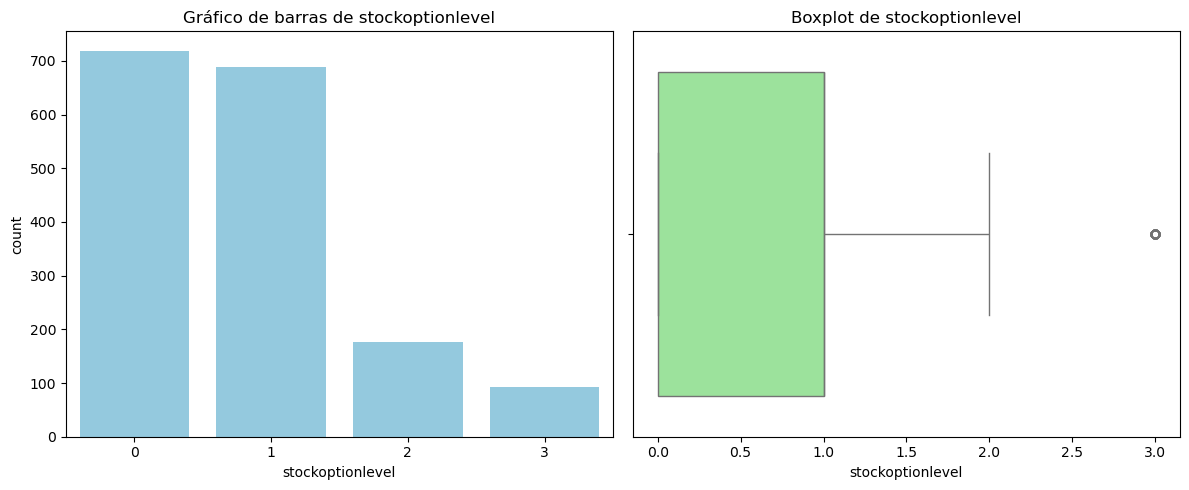

In [19]:
graficar_columna(df_limpio, col="stockoptionlevel")

En el gráfico de barras, el eje X muestra los niveles de opciones sobre acciones, que va del 0 al 3 y en el eje Y el número de empleados en cada nivel. 

La mayoría de los empleados están en nivel 0 ó 1, aproximándose a 700 empleados en ambos casos, con algo más de predominio de empleados en el nivel 0. 

LOs niveles 2 y 3 presentan bastante menos frecuencia de empleados. De manera que puede deducirse que solo una minoría de empleados accede a beneficios de acciones más altos.



Por otro lado, si atendemos a la caja del Boxplot, que cubre el rango intercuartílico (IQR), la mayoría de datos están entre 0 y 1. Situándose la mediana en el 1. Los bigotes se extienden hasta el nivel 2.


Además vemos como los empleados del nivel 3 representan los outliers en este caso, porque es poco frecuente estadísticamente, aunque dentro de la escala definida sea un valor válido. 


De esta información sugiere que la mayoría de empleados no reciben stock options o solo tienen acceso a niveles muy bajos, y solo unos pocos a niveles altos.



Esta columna no presenta nulos, por lo que no habrá que recurrir a imputación de nulos.


#### Tratamiento Outliers columna stockoptionlevel

El nivel 3 se marca como outlier pero lo tendremos en cuenta para el análisis porque representa a un número reducido de empleados que alcanzan ese nivel de beneficios.  Incluso podría resultar interesante analizar cuáles son sus cargos, antigüedad, desempeño, etc., ya que suelen pertenecer a perfiles clave o de alta dirección.


### 7. Columna numcompaniesworked   

Esta columna hace referencia al número de empresas previas en las que ha trabajado. Contiene un 3,52 % (59 outliers).



c:\Users\apdue\anaconda3\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


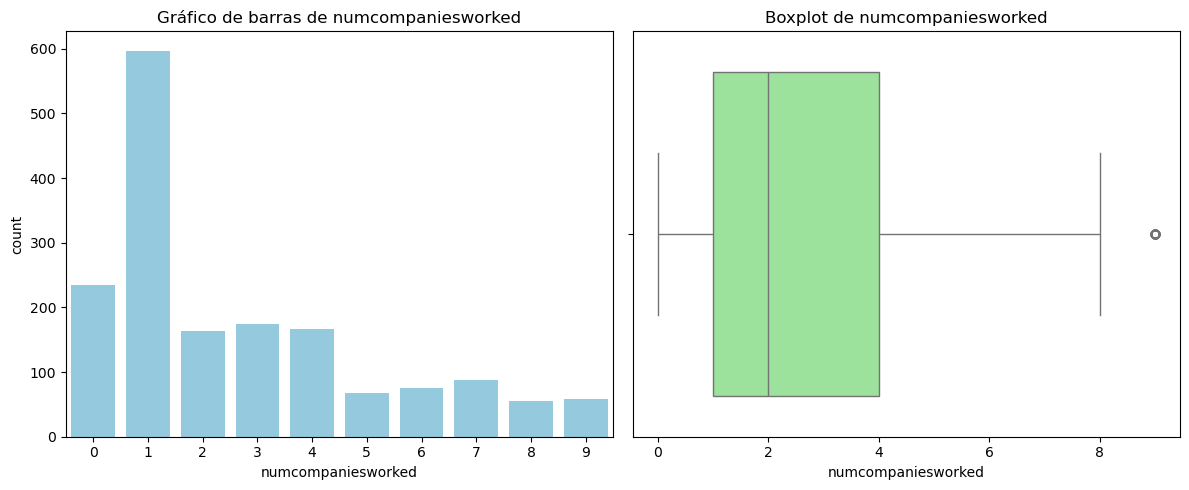

In [20]:
graficar_columna(df_limpio, col="numcompaniesworked")

En el gráfico de barras, el eje x representa el número de empresas en las que se ha trabajado, con un rango de valores del 0 al 9. El Eje Y muestra el número de empleados en cada categoría. 

El valor más frecuente es 1 empresa con aproximadamente 600 empleados. Representa un pico bastante significativo con respecto al resto de grupos, siendo el siguiente grupo más frecuente el de los trabajadores que no han trabajado en ninguna otra empresa, 0 empresas, con algo menos de 250 empleados. 

A partir de 2 empresas trabajadas, la frecuencia va bajando con una tendencia aproximadamente gradual.


Atendiendo al Boxplot, la caja verde (IQR) se extiende aproximadamente de 1 a 4, mostrando precisamente que ese es el rango de empresas en las que han trabajado la mayor parte de los empleados. La mediana estaría en 2 empresas. 


Los bigotes se extienden hasta las 8 empresas y el número de empresas equivalente a 9 , aparece como outlier.

Por tanto se puede concluir que existe poca movilidad laboral en los datos analizados. La gran mayoría de trabajadores ha estado solo en 1 empresa o en su defecto en ninguna aparte de la empresa objeto de estudio. 

Hay un grupo minoritario que ha trabajado en varias empresas y por último los que trabajaron en 8 ó 9 empresas son casos excepcionales. En especial, los que han trabajado en 9, que son los outliers de los datos estudiados. 


Esta columna no tiene nulos por lo que no habrá que recurrir a imputación de nulos.

#### Tratamiento de Outliers


Desde el punto de vista de la rotación de los empleados, se desprende una conclusión importante y es que quienes han cambiado muchas veces de empresa en el pasado, tienen más probabilidades de hacerlo nuevamente, con lo cual, estos outliers son datos importantes a tener en cuenta en nuestro análisis. 




### 8. Columna hourlyrate

Esta columna hace referencia a la tarifa por hora calculada. Presenta un 1,01 % de outliers (17 outliers.)

c:\Users\apdue\anaconda3\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


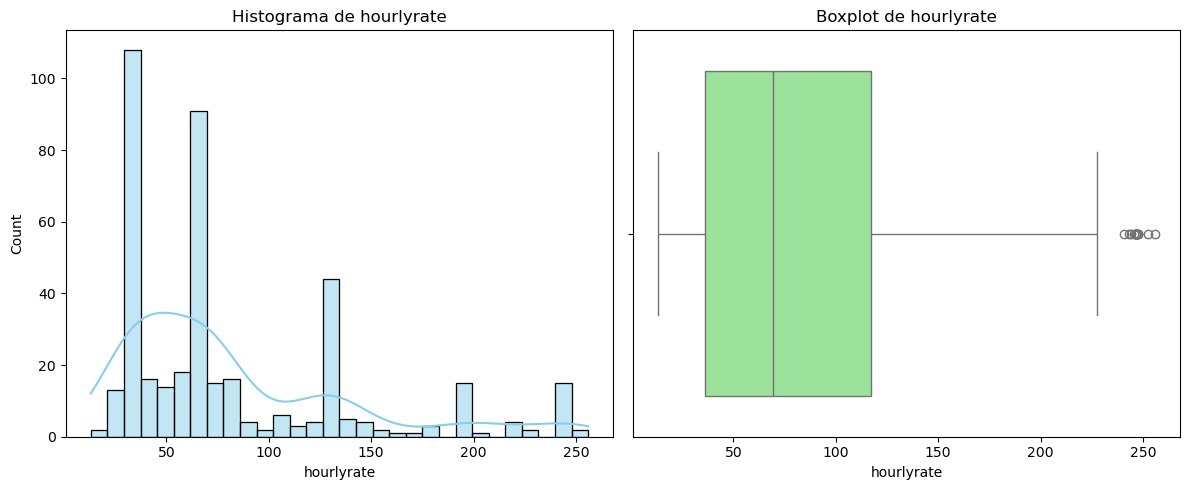

In [15]:
graficar_columna(df_limpio, col="hourlyrate")

En el histograma, el eje x muestra el valor de la tasa por hora, desde 0 hasta 250 y el eje y muestra el número de empleados en cada rango.

La distribución es asimétrica, con picos alrededor de los valores 30, 70 y 130, indicando que muchos empleados tienen esas tasas.  Es llamativo que entre picos, la frecuencia baja de forma muy abrupta. Podría entenderse como que los salarios se asignan en tramos fijos y no de forma continua.  La mayoría de empleados están entre 20 y 130, es decir, tasas por hora moderadas. Resumiendo, la variable no sigue una distribución simétrica, está formada por bandas salariales en forma de picos en valores concretos. 

Después de la tasa de 130, se producen un descenso de los valores con algunos picos puntuales, pero manteniendo la tendencia del descenso. 


Si observamos el boxplot, la caja (IQR) se extiende aproximadamente de 40 a 120, indicando que la mayor parte de los empleados tienen un  hourlyrate en ese rango.

La mediana se sitúa entre 70 - 80 y los bigotes se extienden hasta valores cercanos a 250, donde empiezan los outliers. 


Según el boxplot, los outliers se producen en torno a los 250, no obstante atendiendo al histograma podemos ver como los hay desde la tarifa 200 aproximadamente. Se corresponden con empleados con salarios por hora excepcionalmente altos en comparación con el resto, de ahí su atipicidad. Se trata de empleados con puestos muy especializados o de alto nivel. 


Esta columna presenta un porcentaje de nulos excepcionalmente alto atendiendo al EDA, un 75, 51%. Y ya tenemos otras variables salariales fiables como 
MonthlyIncome y DailyRate, que además, este último, como es lógico, la representación gráfica es exactamente la misma.

Por tanto, dado el porcentaje tan alto de nulos y que ya se tienen otros valores fiables de los que poder extraer la información, se descarta esta columna en nuestro análisis de datos. 



#### 9. Columna yearswithcurrmanager  

Esta columna proporciona información sobre los años trabajando con el mismo gerente. Presenta un 0, 95 % de outliers (16 outliers).

c:\Users\apdue\anaconda3\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


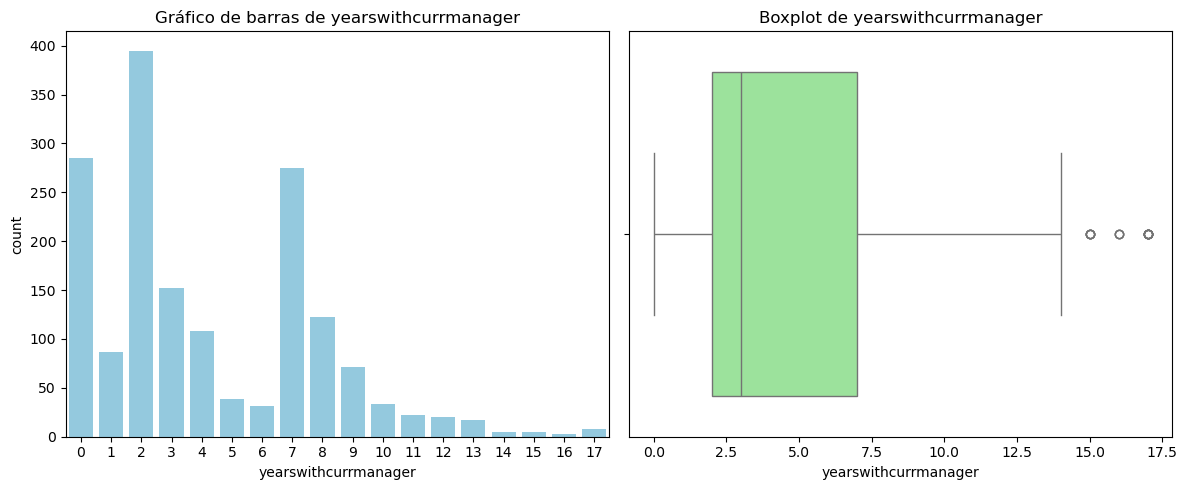

In [16]:
graficar_columna(df_limpio, col="yearswithcurrmanager")